In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import os
print(os.listdir())

import warnings
warnings.filterwarnings('ignore')

['.ipynb_checkpoints', 'heart.csv', 'heartDiseaseAndAges.png', 'heart_Disease.ipynb']


In [4]:
data = pd.read_csv("C:\\Users\\satya\\Heart disease ML\\archive\\heart.csv")


In [5]:
type(data)

pandas.core.frame.DataFrame

In [6]:
data.shape

(303, 14)

In [7]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [8]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


1. age: The person's age in years

2. sex: The person's sex (1 = male, 0 = female)

3. cp: The chest pain experienced (Value 1: typical angina, Value 2: atypical angina, Value 3: non-anginal pain, Value 4: asymptomatic)

4. trestbps: The person's resting blood pressure (mm Hg on admission to the hospital)

5. chol: The person's cholesterol measurement in mg/dl

6. fbs: The person's fasting blood sugar (> 120 mg/dl, 1 = true; 0 = false)

7. restecg: Resting electrocardiographic measurement (0 = normal, 1 = having ST-T wave abnormality, 2 = showing probable or definite left ventricular hypertrophy by Estes' criteria)

8. thalach: The person's maximum heart rate achieved

9. exang: Exercise induced angina (1 = yes; 0 = no)

10. oldpeak: ST depression induced by exercise relative to rest ('ST' relates to positions on the ECG plot. See more here)

11. slope: the slope of the peak exercise ST segment (Value 1: upsloping, Value 2: flat, Value 3: downsloping)

12. ca: The number of major vessels (0-3)

13. thal: A blood disorder called thalassemia (3 = normal; 6 = fixed defect; 7 = reversable defect)

14. target: Heart disease (0 = no, 1 = yes)

Heart disease risk factors to the following: high cholesterol, high blood pressure, diabetes, weight, family history and smoking . 

According to another source , the major factors that can't be changed are: increasing age, male gender and heredity. 

Note that thalassemia, one of the variables in this dataset, is heredity. 

Major factors that can be modified are: Smoking, high cholesterol, high blood pressure, physical inactivity, and being overweight and having diabetes. 

Other factors include stress, alcohol and poor diet/nutrition.

In [10]:
data.sample(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
260,66,0,0,178,228,1,1,165,1,1.0,1,2,3,0
147,60,0,3,150,240,0,1,171,0,0.9,2,0,2,1
35,46,0,2,142,177,0,0,160,1,1.4,0,0,2,1
122,41,0,2,112,268,0,0,172,1,0.0,2,0,2,1
265,66,1,0,112,212,0,0,132,1,0.1,2,1,2,0


In [11]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [12]:
data.isnull().sum().sum()

0

###So, we have no missing values

In [13]:
print(data.corr()["target"].abs().sort_values(ascending=False))

target      1.000000
exang       0.436757
cp          0.433798
oldpeak     0.430696
thalach     0.421741
ca          0.391724
slope       0.345877
thal        0.344029
sex         0.280937
age         0.225439
trestbps    0.144931
restecg     0.137230
chol        0.085239
fbs         0.028046
Name: target, dtype: float64


### This shows that most columns are moderately correlated with target, but 'fbs' is very weakly correlated.

# Exploratory Data Analysis (EDA)

### Problem Statement

 - Cardiovascular disease or heart disease describes a range of conditions that affect your heart. Diseases under the heart disease umbrella include blood vessel diseases, such as coronary artery disease. From WHO statistics every year 17.9 million dying from heart disease. The medical study says that human life style is the main reason behind this heart problem. Apart from this there are many key factors which warns that the person may/maynot getting chance of heart disease.
 

### DataSet Collection Source 

 - Datasource Collection: https://www.kaggle.com/datasets
 - Data consists of 303 rows and 14 columns.

In [16]:
y = data["target"]

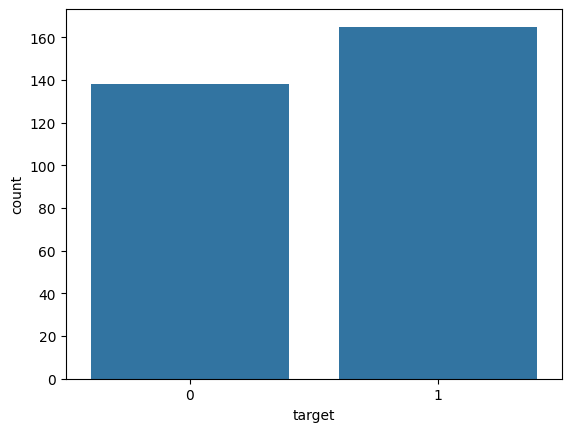

target
1    165
0    138
Name: count, dtype: int64


In [22]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data
data = pd.read_csv(r"C:\Users\satya\Heart disease ML\archive\heart.csv")

# Plot the count of target values
ax = sns.countplot(x="target", data=data)

# Display the plot
plt.show()

# Get and print the value counts of the target column
target_temp = data["target"].value_counts()
print(target_temp)


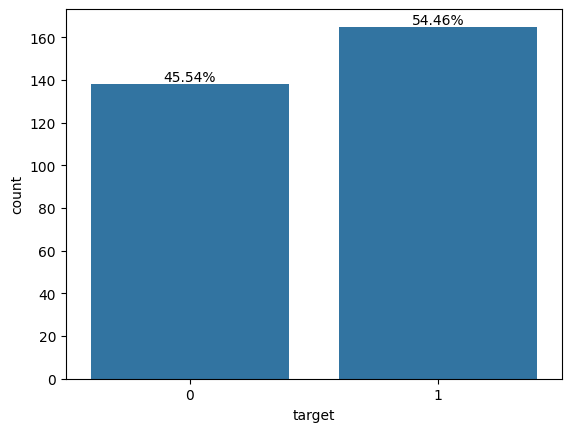

In [25]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data
data = pd.read_csv(r"C:\Users\satya\Heart disease ML\archive\heart.csv")

# Plot the count of target values
ax = sns.countplot(x="target", data=data)

# Get the counts of each unique value in the target column
target_temp = data["target"].value_counts()

# Calculate the total number of patients
total = len(data)

# Display the counts and percentages above the bars
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2.,
            height,
            '{:1.2f}%'.format((height / total) * 100),
            ha="center", va="bottom")

# Show the plot
plt.show()


From the total dataset of 303 patients, 165 (54.46%) have a heart disease (target=1)

# Percentage of patient with or without heart problems in the given dataset

In [26]:
print("Percentage of patience without heart problems: "+str(round(target_temp[0]*100/303,2)))
print("Percentage of patience with heart problems: "+str(round(target_temp[1]*100/303,2)))

Percentage of patience without heart problems: 45.54
Percentage of patience with heart problems: 54.46


In [27]:
data["sex"].unique()

array([1, 0], dtype=int64)

### Here 0 is female and 1 is male patients

In [28]:
countFemale = len(data[data.sex == 0])
countMale = len(data[data.sex == 1])
print("Percentage of Female Patients:{:.2f}%".format((countFemale)/(len(data.sex))*100))
print("Percentage of Male Patients:{:.2f}%".format((countMale)/(len(data.sex))*100))

Percentage of Female Patients:31.68%
Percentage of Male Patients:68.32%


In [29]:
categorial = [('sex', ['female', 'male']), 
              ('cp', ['typical angina', 'atypical angina', 'non-anginal pain', 'asymptomatic']), 
              ('fbs', ['fbs > 120mg', 'fbs < 120mg']), 
              ('restecg', ['normal', 'ST-T wave', 'left ventricular']), 
              ('exang', ['yes', 'no']), 
              ('slope', ['upsloping', 'flat', 'downsloping']), 
              ('thal', ['normal', 'fixed defect', 'reversible defect'])]

In [30]:
def plotGrid(isCategorial):
    if isCategorial:
        [plotCategorial(x[0], x[1], i) for i, x in enumerate(categorial)] 
    else:
        [plotContinuous(x[0], x[1], i) for i, x in enumerate(continuous)] 

In [31]:
def plotCategorial(attribute, labels, ax_index):
    sns.countplot(x=attribute, data=data, ax=axes[ax_index][0])
    sns.countplot(x='target', hue=attribute, data=data, ax=axes[ax_index][1])
    avg = data[[attribute, 'target']].groupby([attribute], as_index=False).mean()
    sns.barplot(x=attribute, y='target', hue=attribute, data=avg, ax=axes[ax_index][2])
    
    for t, l in zip(axes[ax_index][1].get_legend().texts, labels):
        t.set_text(l)
    for t, l in zip(axes[ax_index][2].get_legend().texts, labels):
        t.set_text(l)


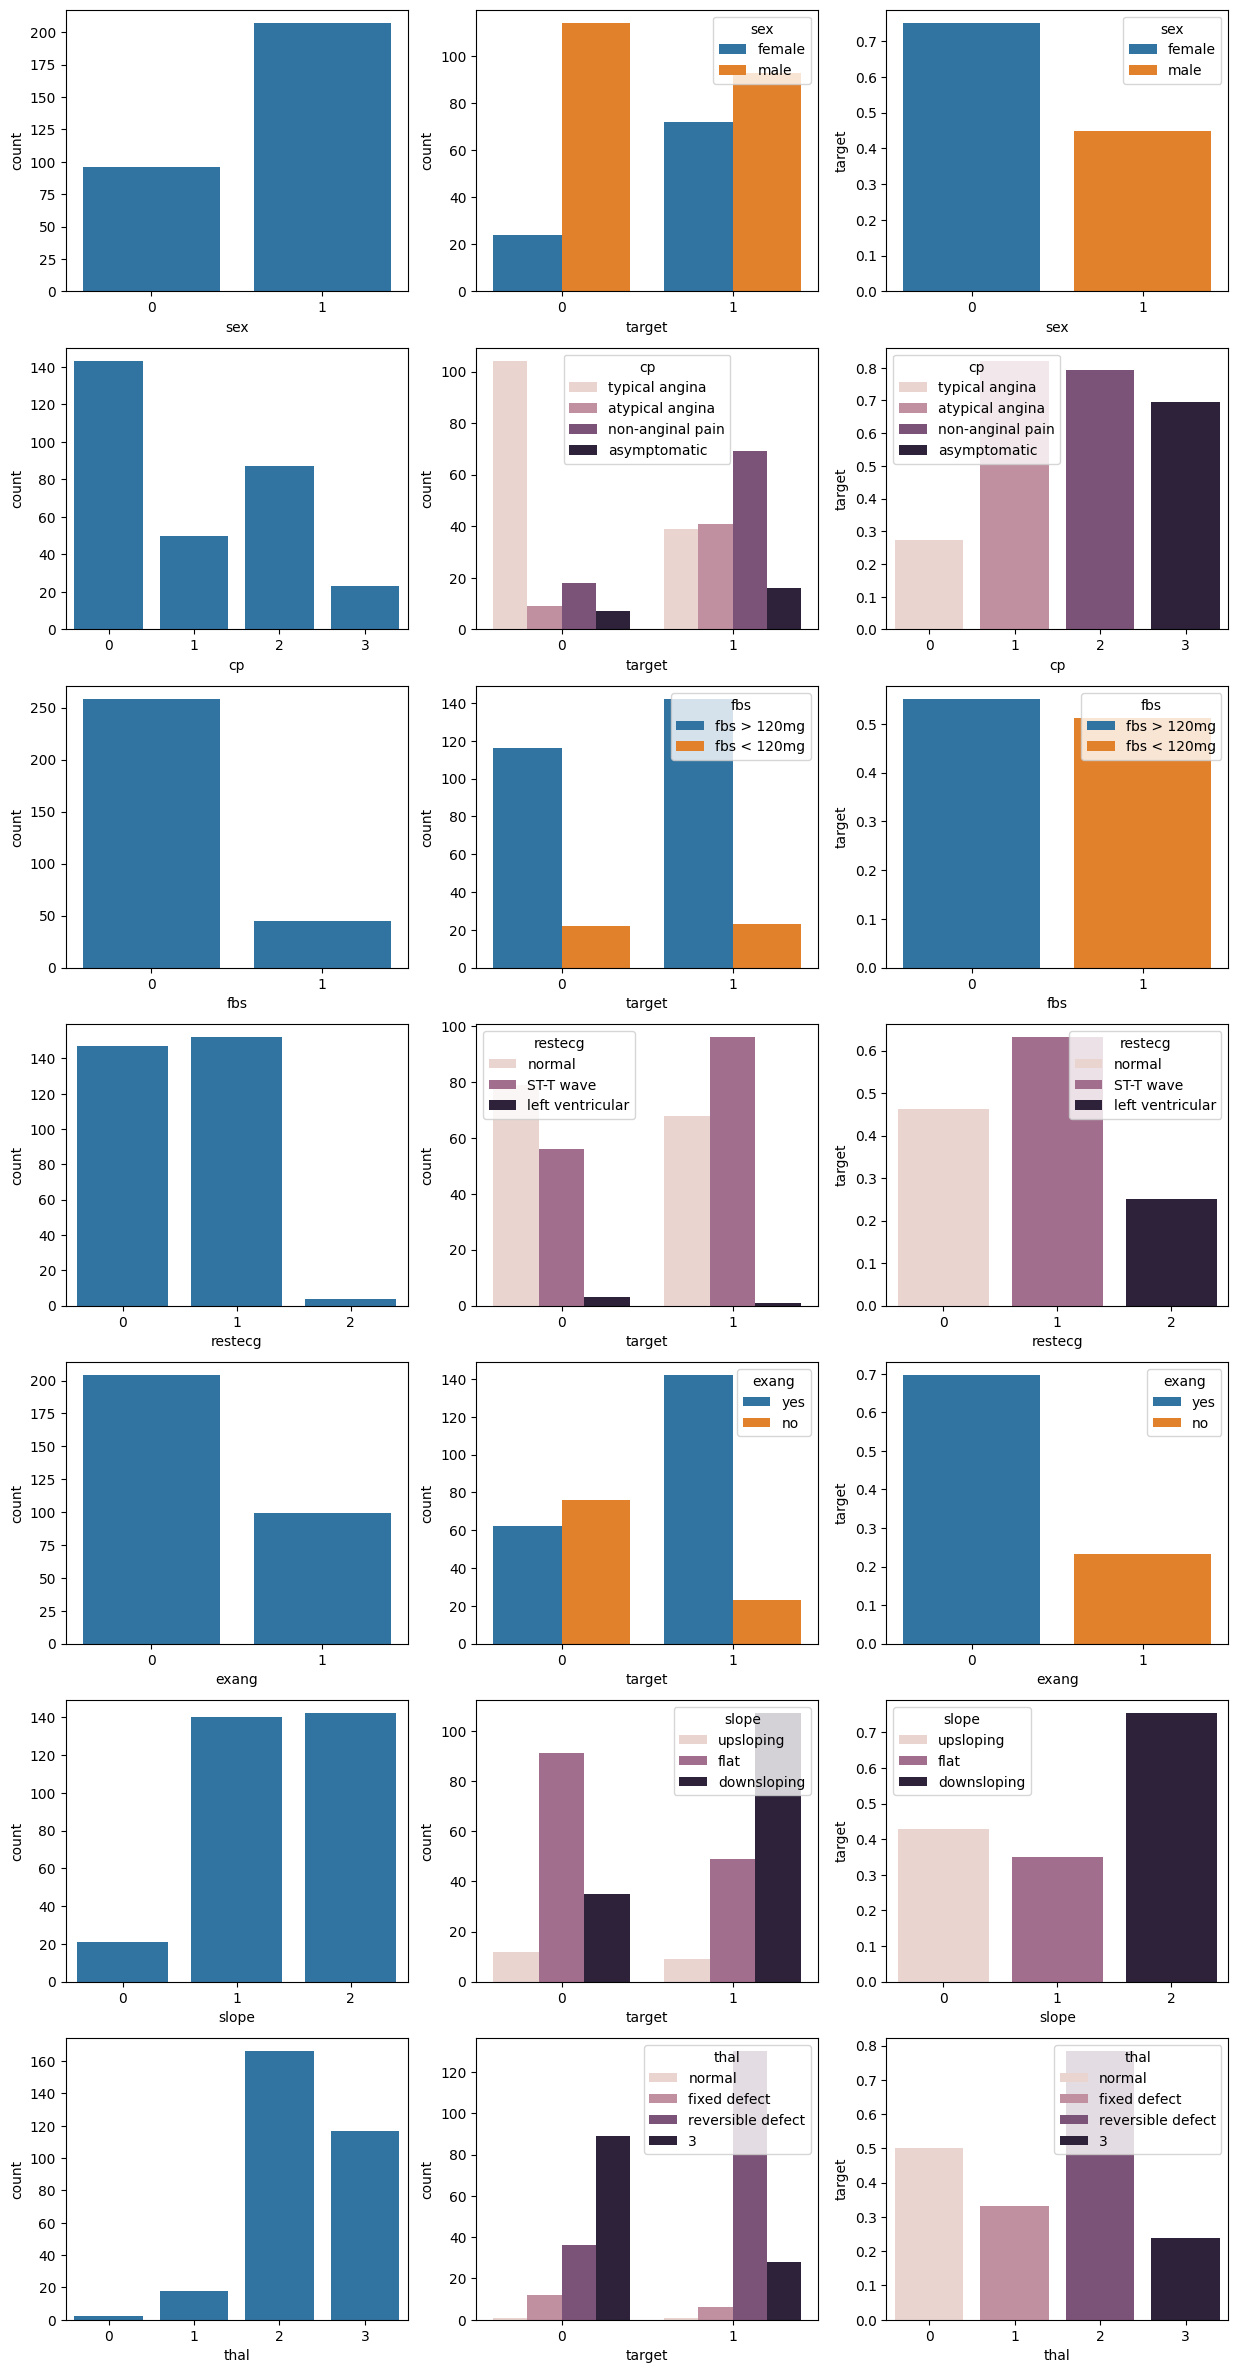

In [32]:
fig_categorial, axes = plt.subplots(nrows=len(categorial), ncols=3, figsize=(15, 30))

plotGrid(isCategorial=True)

In [33]:
continuous = [('trestbps', 'blood pressure in mm Hg'), 
              ('chol', 'serum cholestoral in mg/d'), 
              ('thalach', 'maximum heart rate achieved'), 
              ('oldpeak', 'ST depression by exercise relative to rest'), 
              ('ca', '# major vessels: (0-3) colored by flourosopy')]

In [34]:
def plotContinuous(attribute, xlabel, ax_index):
    sns.distplot(data[[attribute]], ax=axes[ax_index][0])
    axes[ax_index][0].set(xlabel=xlabel, ylabel='density')
    sns.violinplot(x='target', y=attribute, data=data, ax=axes[ax_index][1])

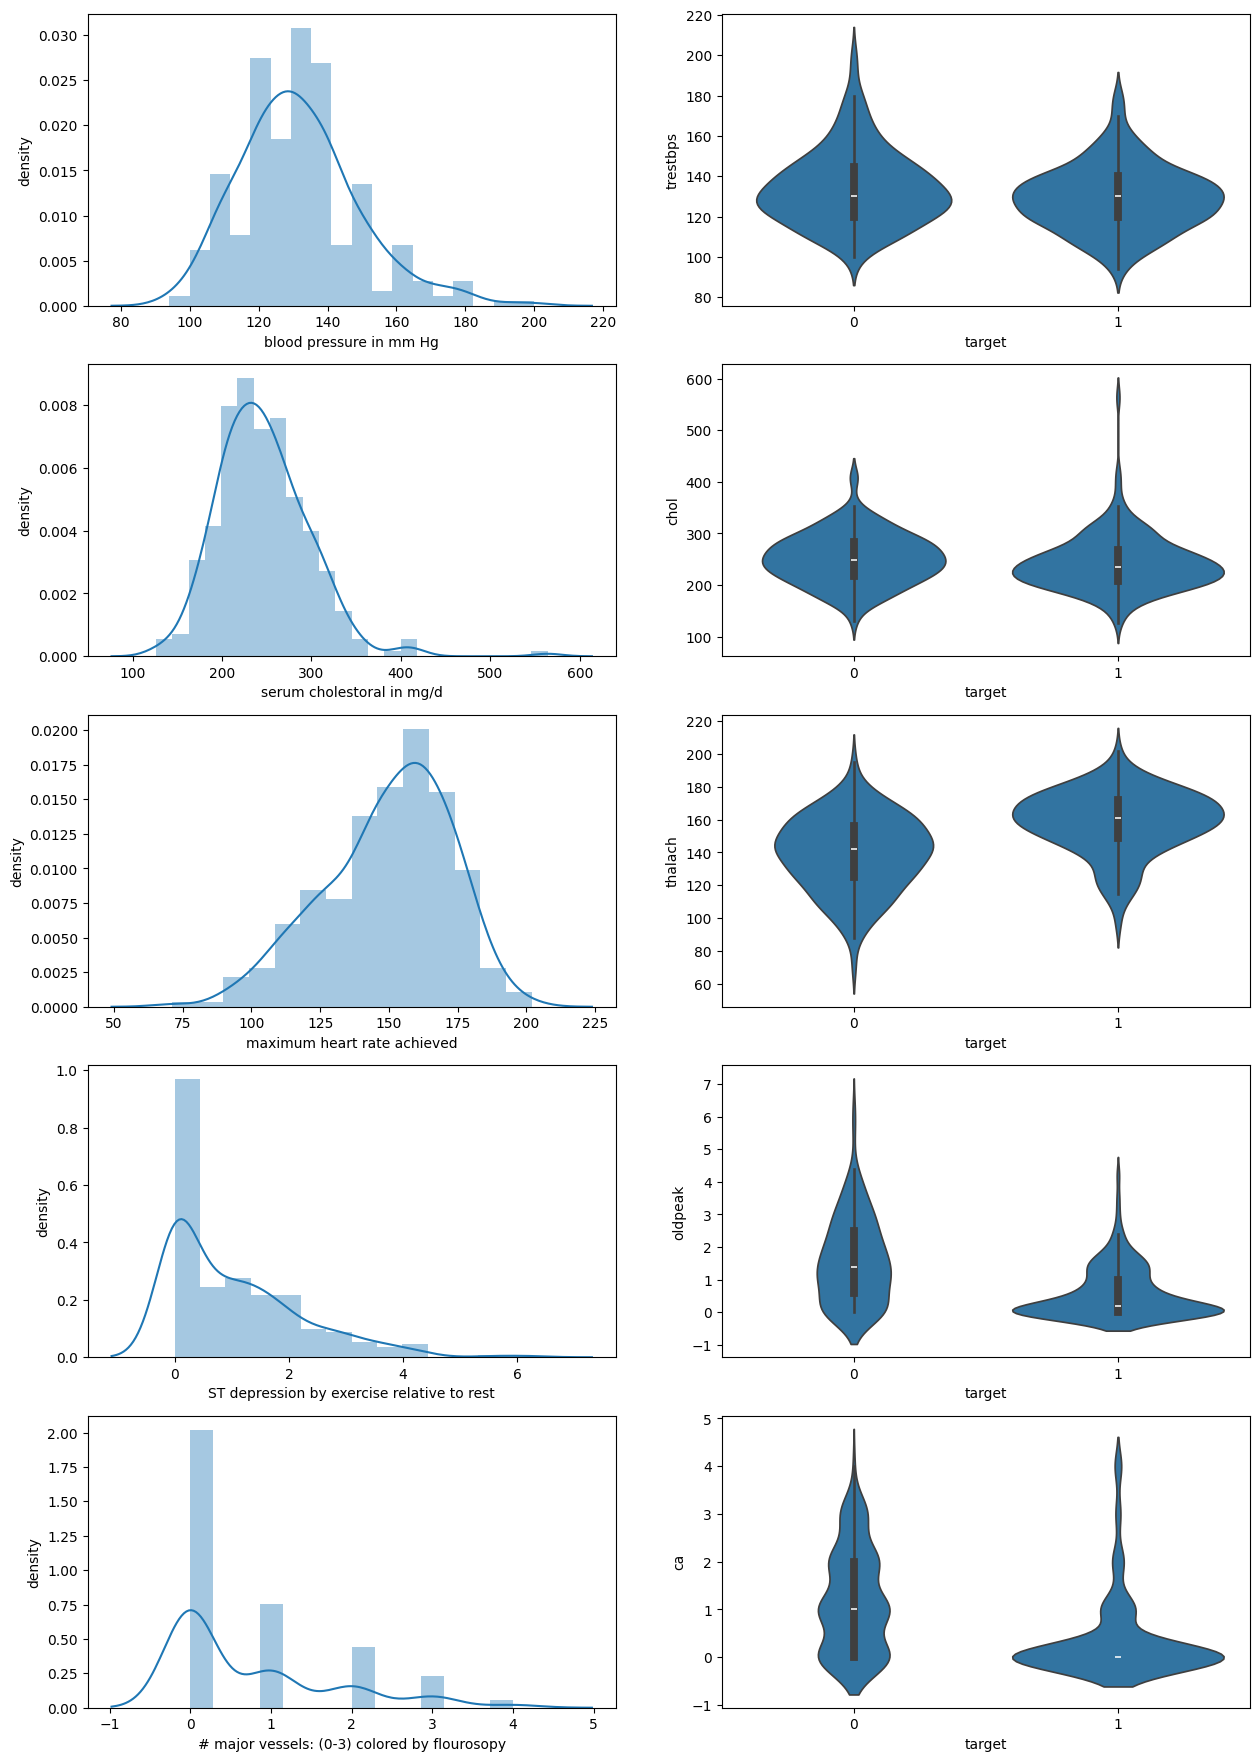

In [35]:
fig_continuous, axes = plt.subplots(nrows=len(continuous), ncols=2, figsize=(15, 22))

plotGrid(isCategorial=False)

# Heart Disease Frequency for ages

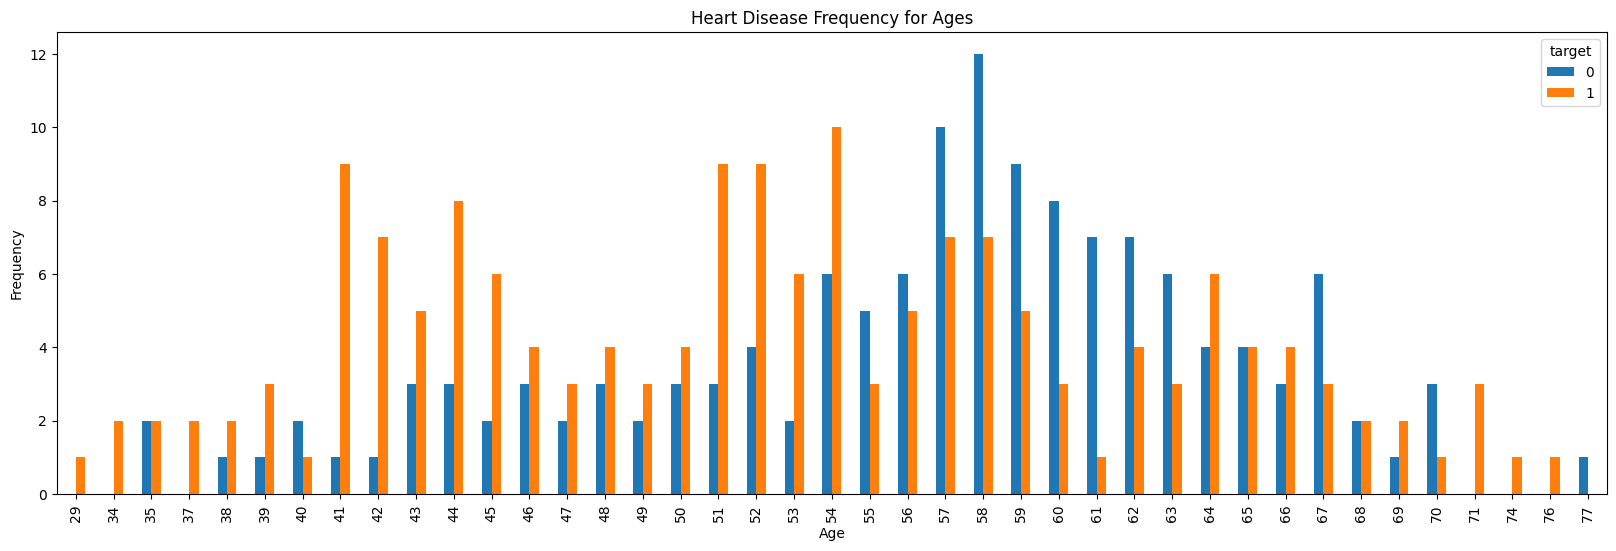

In [36]:
pd.crosstab(data.age,data.target).plot(kind="bar",figsize=(20,6))
plt.title('Heart Disease Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.savefig('heartDiseaseAndAges.png')
plt.show()

# Heart Disease frequency for sex (where 0 is female and 1 is male and "red" is have heart disease and "blue" is don't have heart disease)

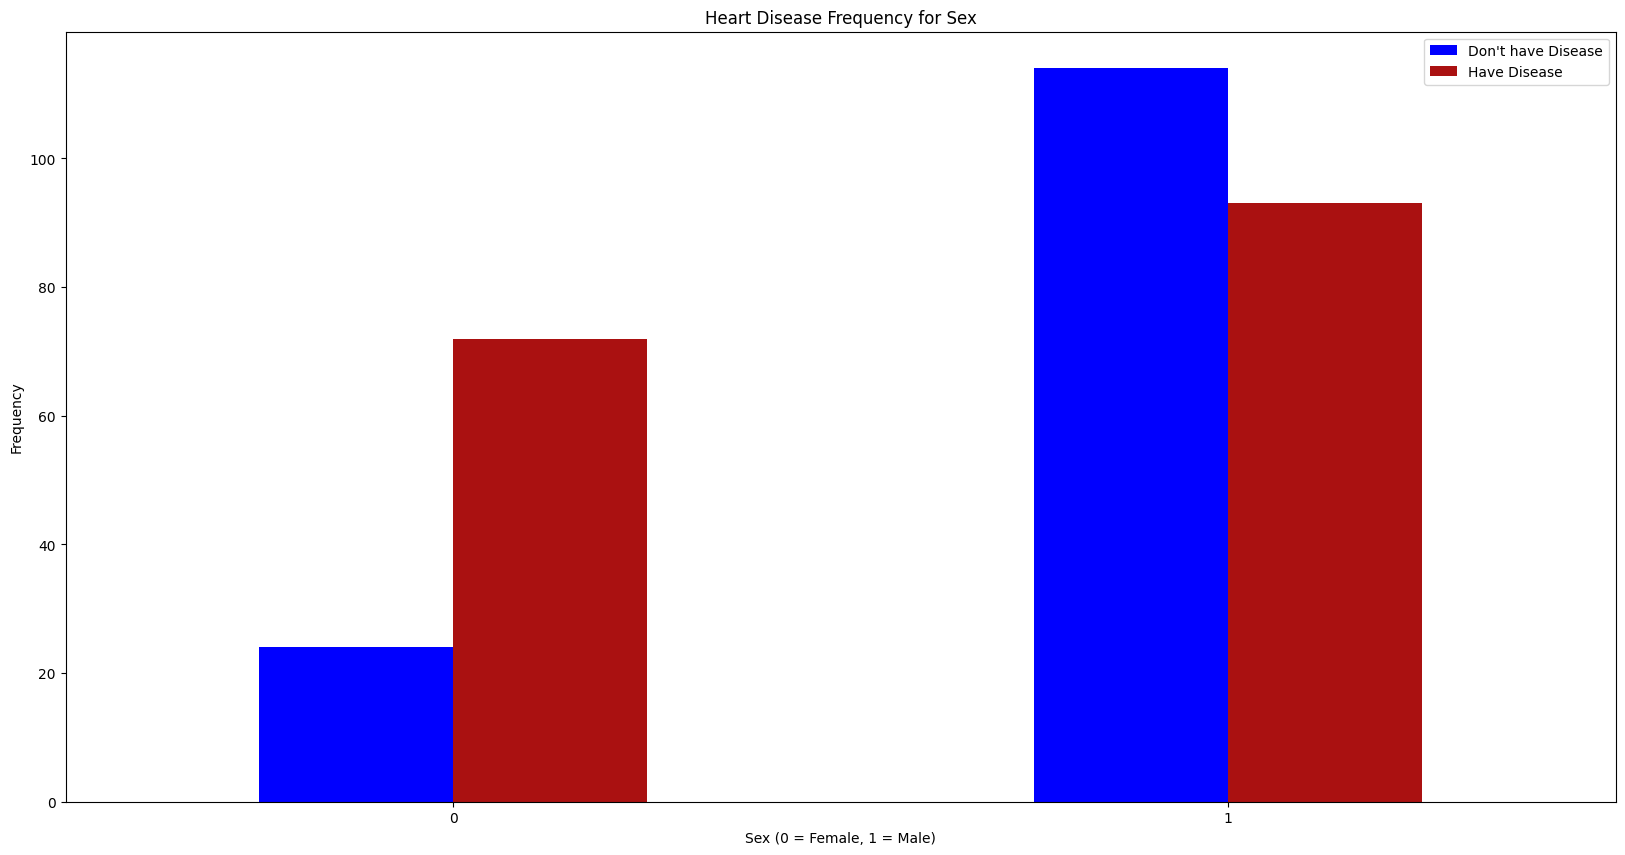

In [37]:
pd.crosstab(data.sex,data.target).plot(kind="bar",figsize=(20,10),color=['blue','#AA1111' ])
plt.title('Heart Disease Frequency for Sex')
plt.xlabel('Sex (0 = Female, 1 = Male)')
plt.xticks(rotation=0)
plt.legend(["Don't have Disease", "Have Disease"])
plt.ylabel('Frequency')
plt.show()

run this line after prediction

In [38]:
data.columns = ['age', 'sex', 'chest_pain_type', 'resting_blood_pressure', 'cholesterol', 'fasting_blood_sugar', 'rest_ecg', 'max_heart_rate_achieved',
       'exercise_induced_angina', 'st_depression', 'st_slope', 'num_major_vessels', 'thalassemia', 'target']

In [39]:
data.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


# Heart disease according to Fasting Blood sugar 

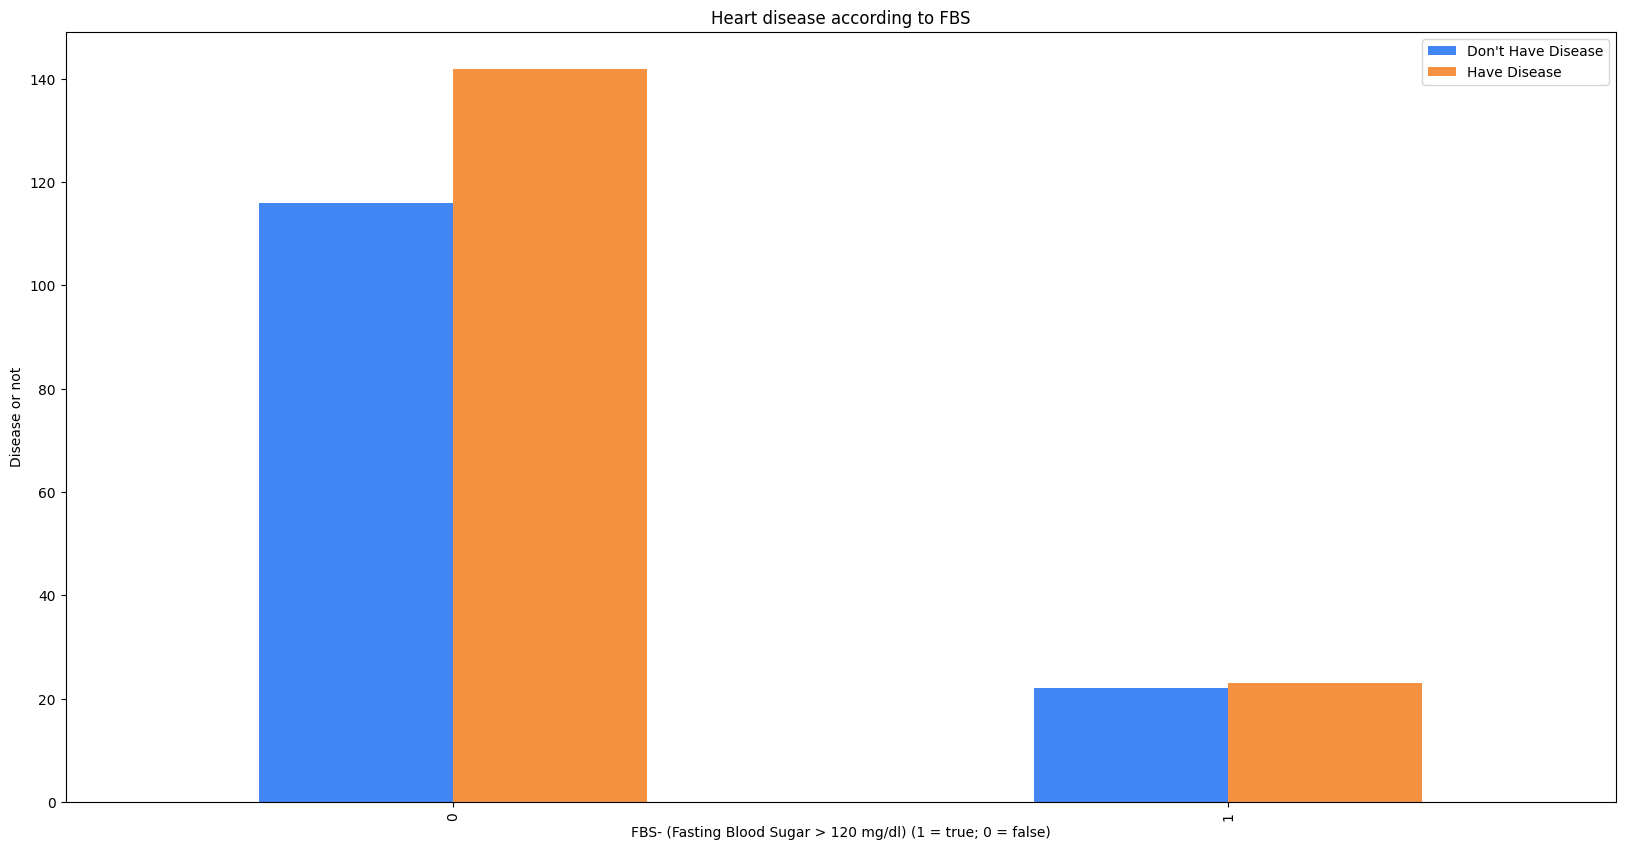

In [40]:
pd.crosstab(data.fasting_blood_sugar,data.target).plot(kind="bar",figsize=(20,10),color=['#4286f4','#f49242'])
plt.title("Heart disease according to FBS")
plt.xlabel('FBS- (Fasting Blood Sugar > 120 mg/dl) (1 = true; 0 = false)')
plt.xticks(rotation=90)
plt.legend(["Don't Have Disease", "Have Disease"])
plt.ylabel('Disease or not')
plt.show()

# Analysing the chest pain (4 types of chest pain)

#[Value 1: typical angina, Value 2: atypical angina, Value 3: non-anginal pain, Value 4: asymptomatic]

In [41]:
data["chest_pain_type"].unique()

array([3, 2, 1, 0], dtype=int64)

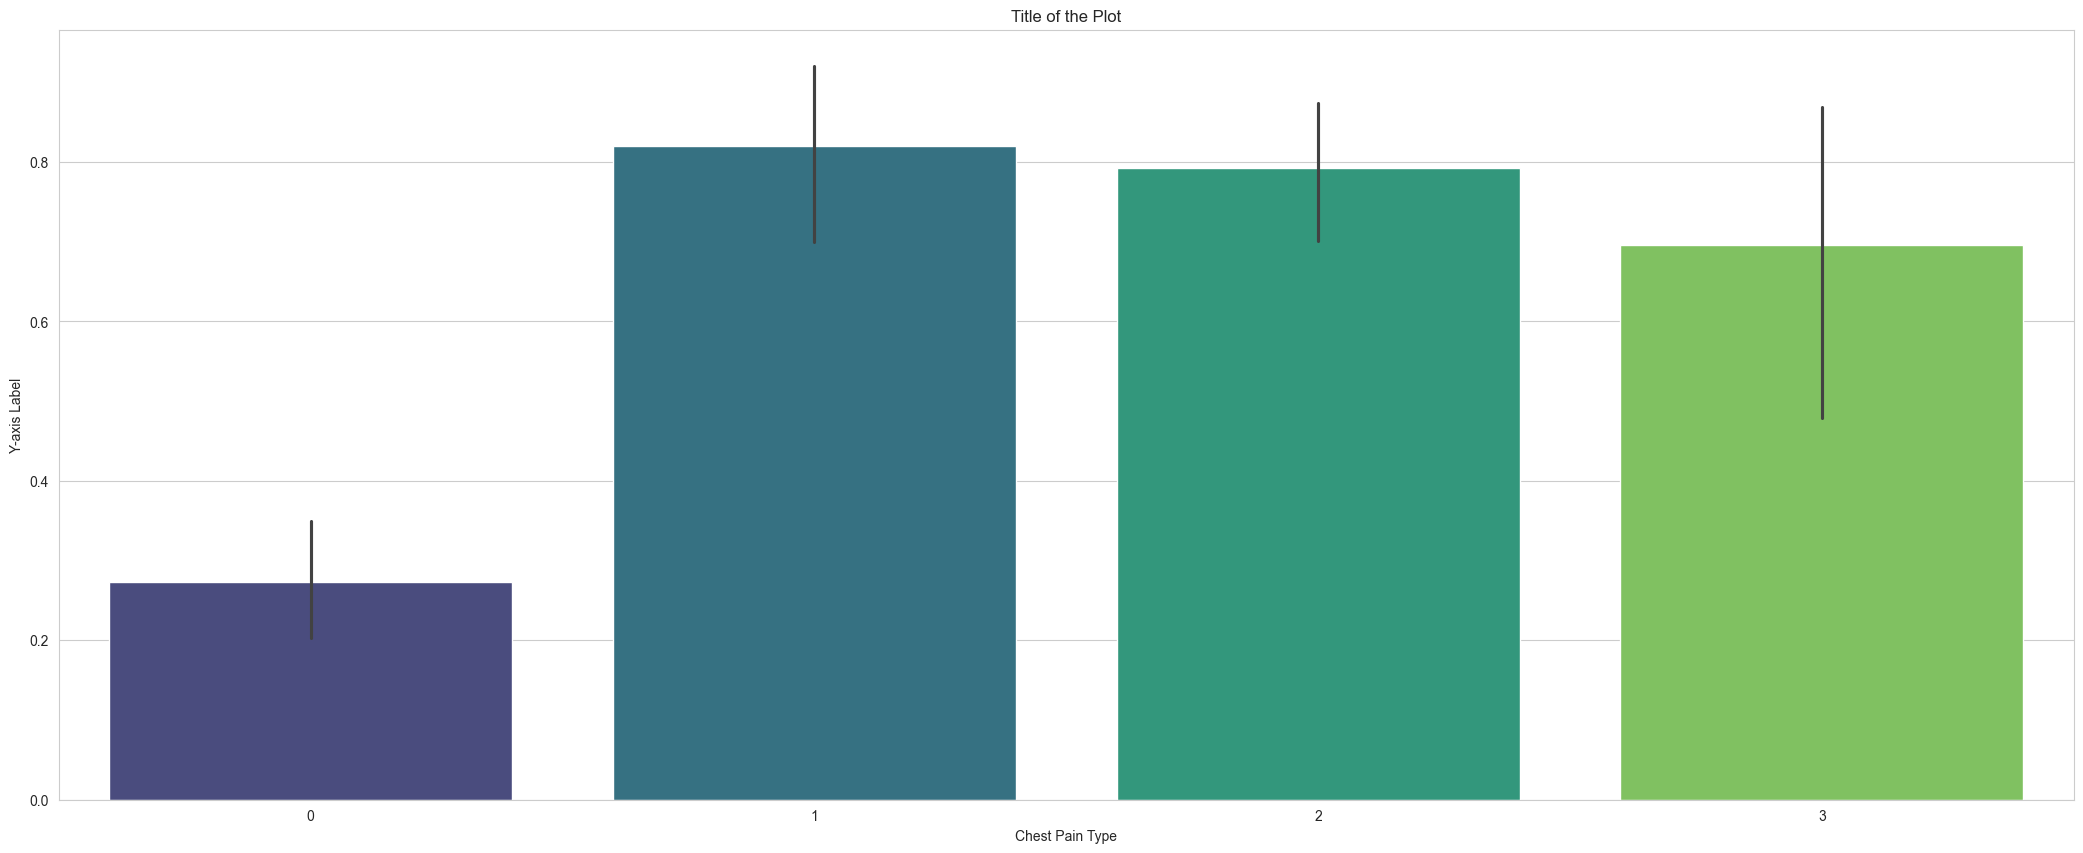

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style with grid lines
sns.set_style("whitegrid")

# Create the bar plot
plt.figure(figsize=(26, 10))
sns.barplot(x=data["chest_pain_type"], y=y, palette="viridis")
plt.xlabel("Chest Pain Type")
plt.ylabel("Y-axis Label")
plt.title("Title of the Plot")
plt.show()


# Analysing The person's resting blood pressure (mm Hg on admission to the hospital)

In [43]:
data["resting_blood_pressure"].unique()

array([145, 130, 120, 140, 172, 150, 110, 135, 160, 105, 125, 142, 155,
       104, 138, 128, 108, 134, 122, 115, 118, 100, 124,  94, 112, 102,
       152, 101, 132, 148, 178, 129, 180, 136, 126, 106, 156, 170, 146,
       117, 200, 165, 174, 192, 144, 123, 154, 114, 164], dtype=int64)

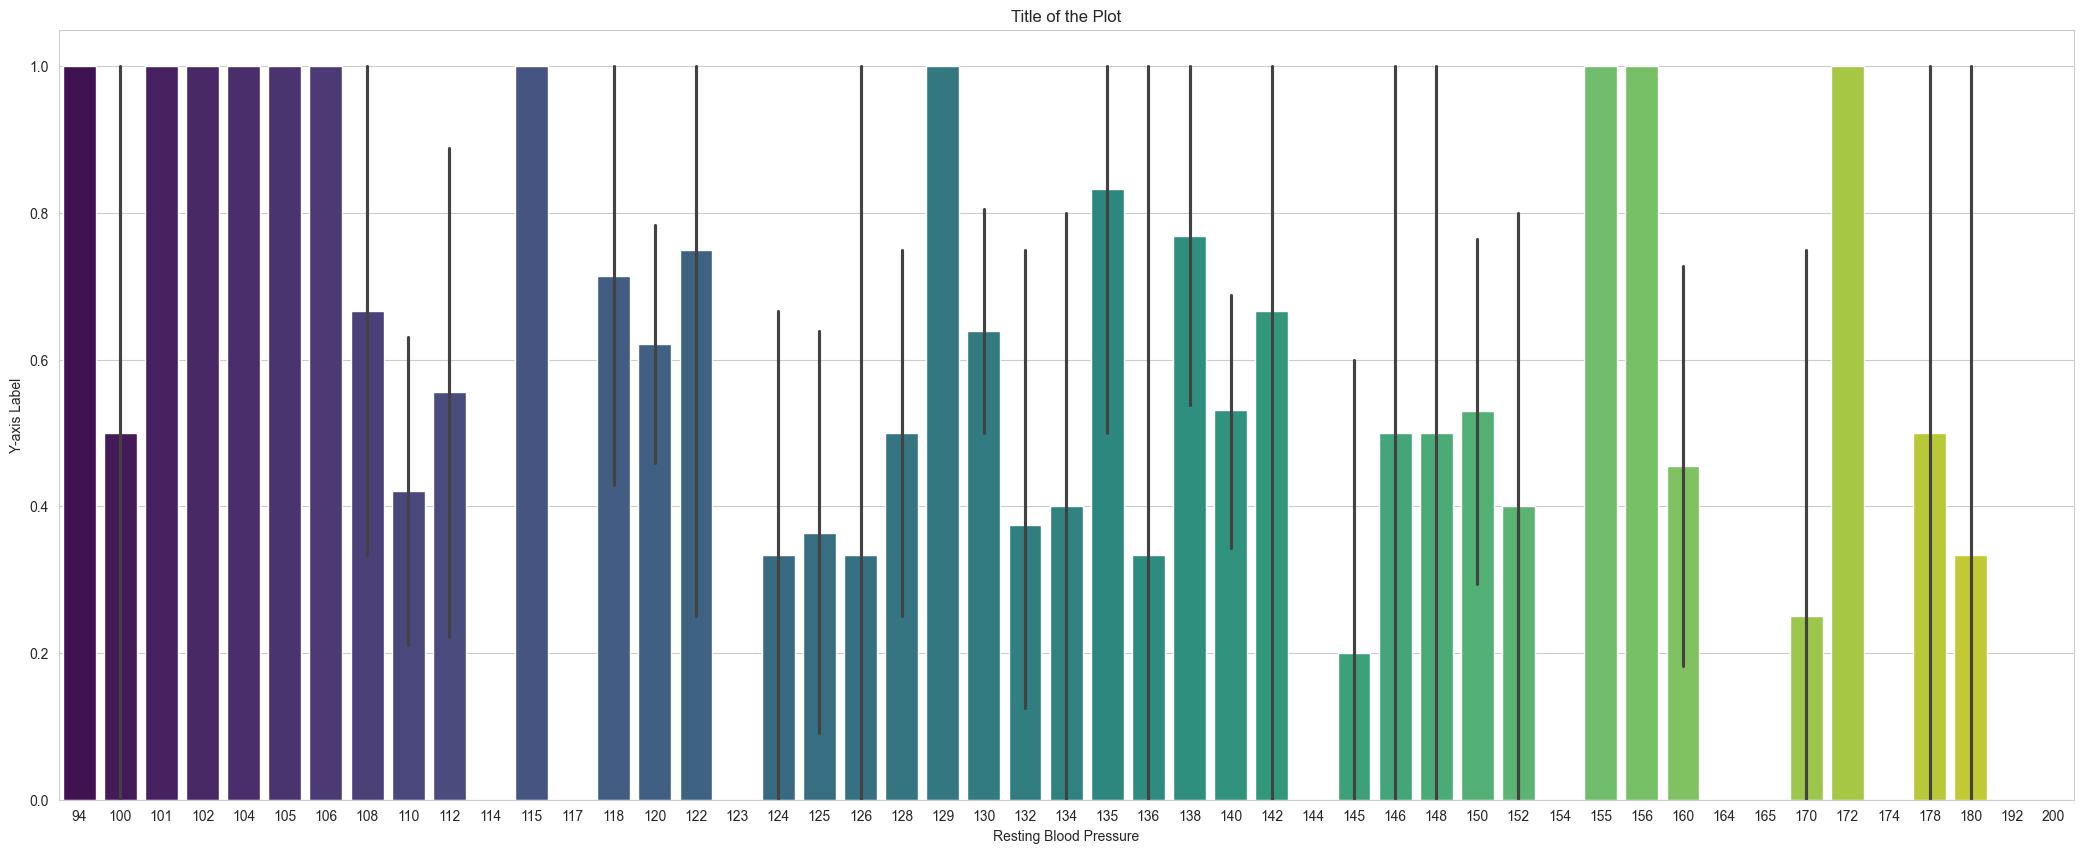

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style with grid lines
sns.set_style("whitegrid")

# Create the bar plot
plt.figure(figsize=(26, 10))
sns.barplot(x=data["resting_blood_pressure"], y=y, palette="viridis")
plt.xlabel("Resting Blood Pressure")
plt.ylabel("Y-axis Label")
plt.title("Title of the Plot")
plt.show()


# Analysing the Resting electrocardiographic measurement (0 = normal, 1 = having ST-T wave abnormality, 2 = showing probable or definite left ventricular hypertrophy by Estes' criteria)

In [45]:
data["rest_ecg"].unique()

array([0, 1, 2], dtype=int64)

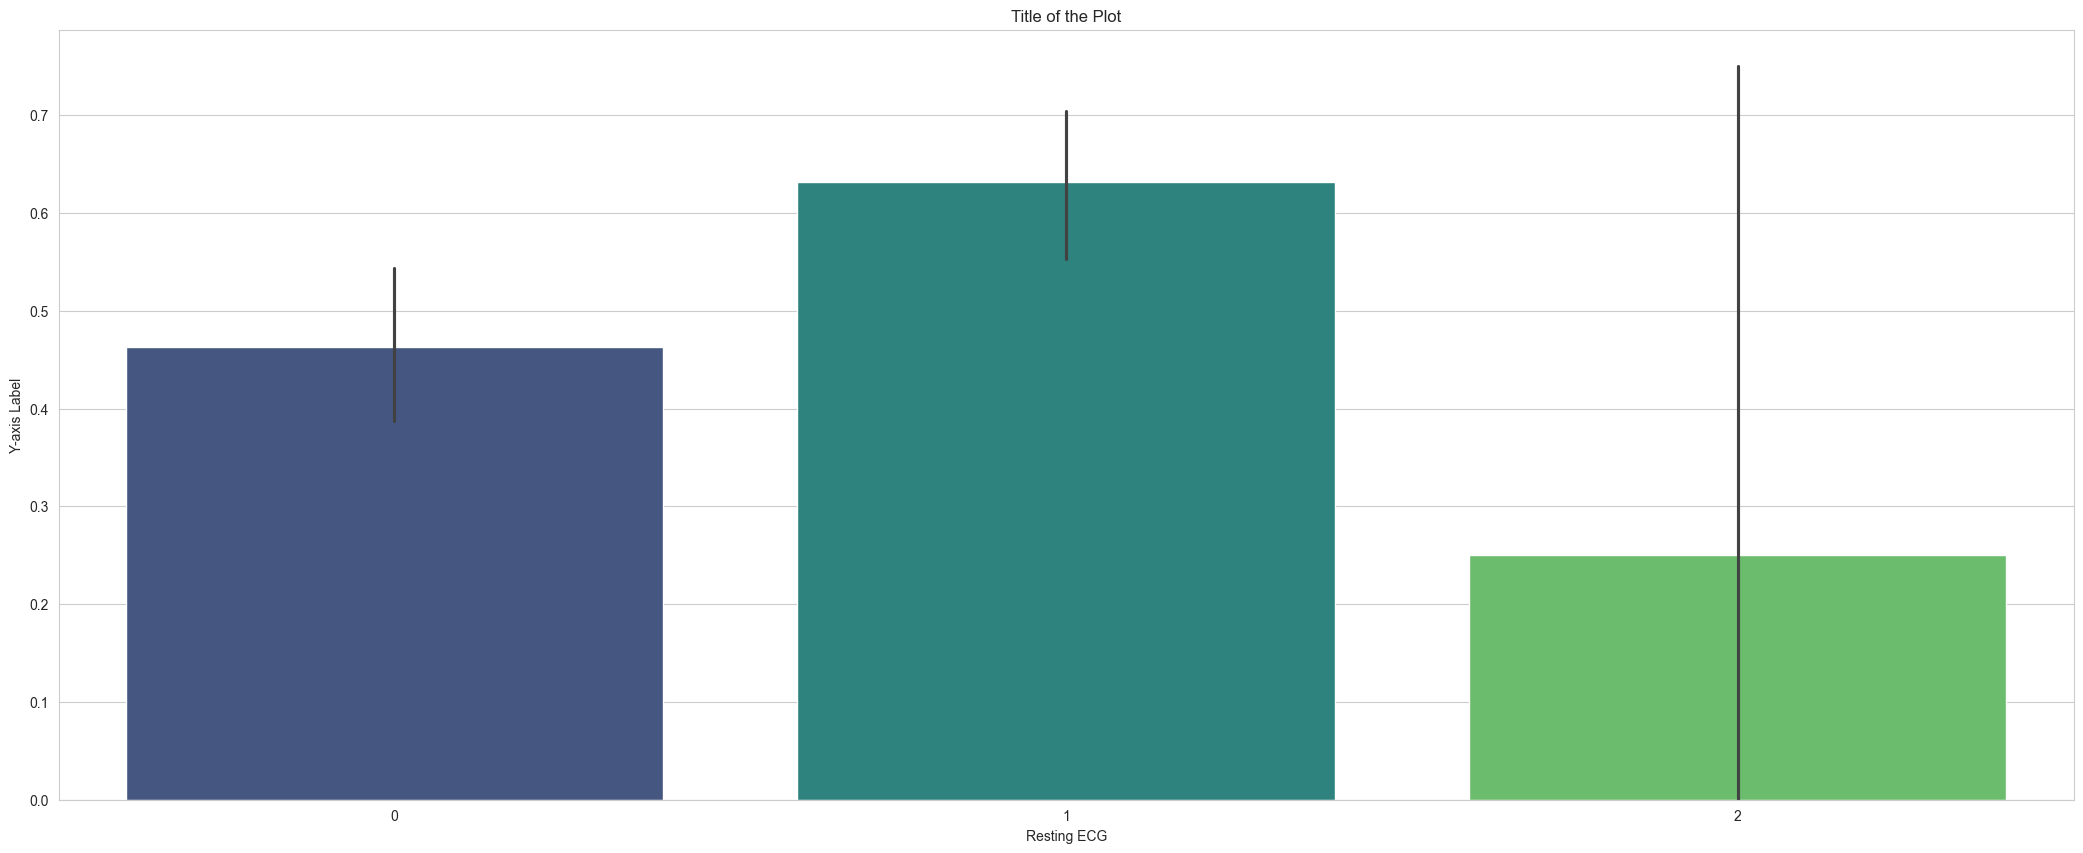

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style with grid lines
sns.set_style("whitegrid")

# Create the bar plot
plt.figure(figsize=(26, 10))
sns.barplot(x=data["rest_ecg"], y=y, palette="viridis")
plt.xlabel("Resting ECG")
plt.ylabel("Y-axis Label")
plt.title("Title of the Plot")
plt.show()


## people with restecg '1' and '0' are much more likely to have a heart disease than with restecg '2'

#Analysing Exercise induced angina (1 = yes; 0 = no)

In [47]:
data["exercise_induced_angina"].unique()

array([0, 1], dtype=int64)

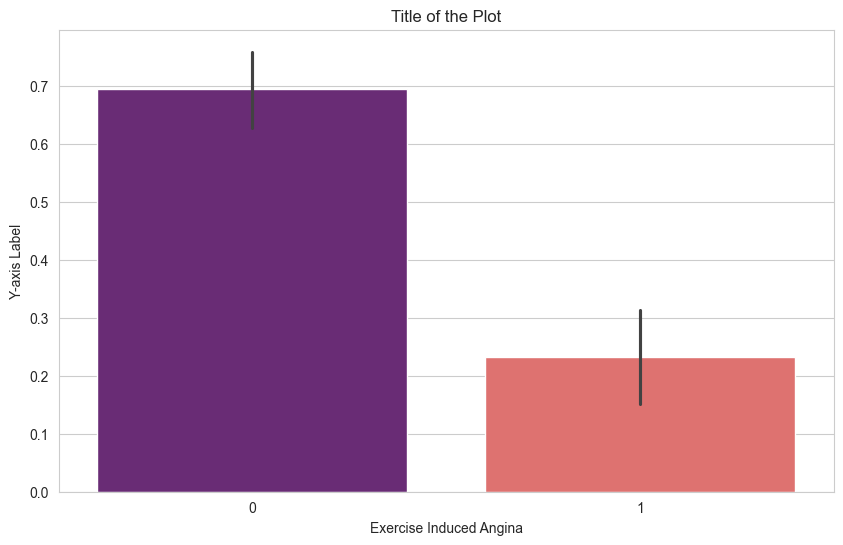

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style with grid lines
sns.set_style("whitegrid")

# Create the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=data["exercise_induced_angina"], y=y, palette="magma")
plt.xlabel("Exercise Induced Angina")
plt.ylabel("Y-axis Label")
plt.title("Title of the Plot")
plt.show()


###People with exercise_induced_angina=1 are much less likely to have heart problems

# Analysing the slope of the peak exercise ST segment (Value 1: upsloping, Value 2: flat, Value 3: downsloping)

In [49]:
data["st_slope"].unique()

array([0, 2, 1], dtype=int64)

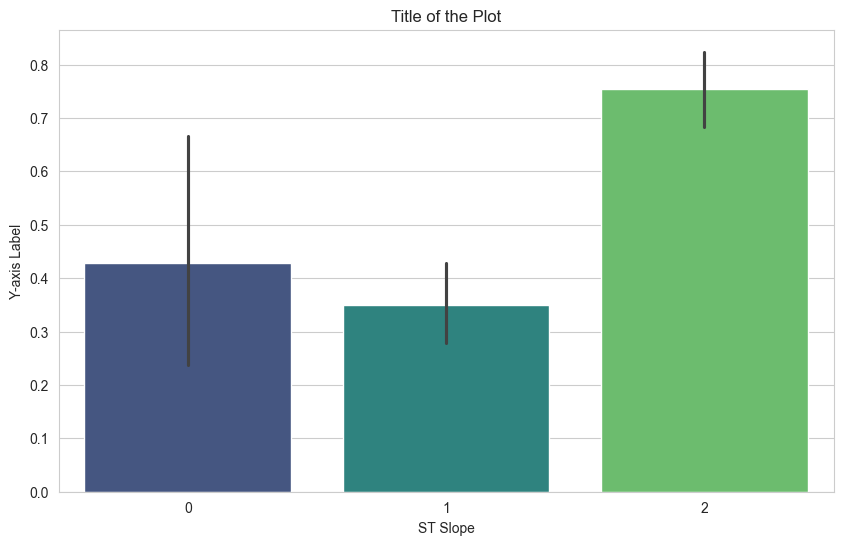

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style with grid lines
sns.set_style("whitegrid")

# Create the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=data["st_slope"], y=y, palette="viridis")
plt.xlabel("ST Slope")
plt.ylabel("Y-axis Label")
plt.title("Title of the Plot")
plt.show()


Slope '2' causes heart pain much more than Slope '0' and '1'

# Analysing number of major vessels (0-3) colored by flourosopy

In [51]:
data["num_major_vessels"].unique()

array([0, 2, 1, 3, 4], dtype=int64)

### count num_major vessels

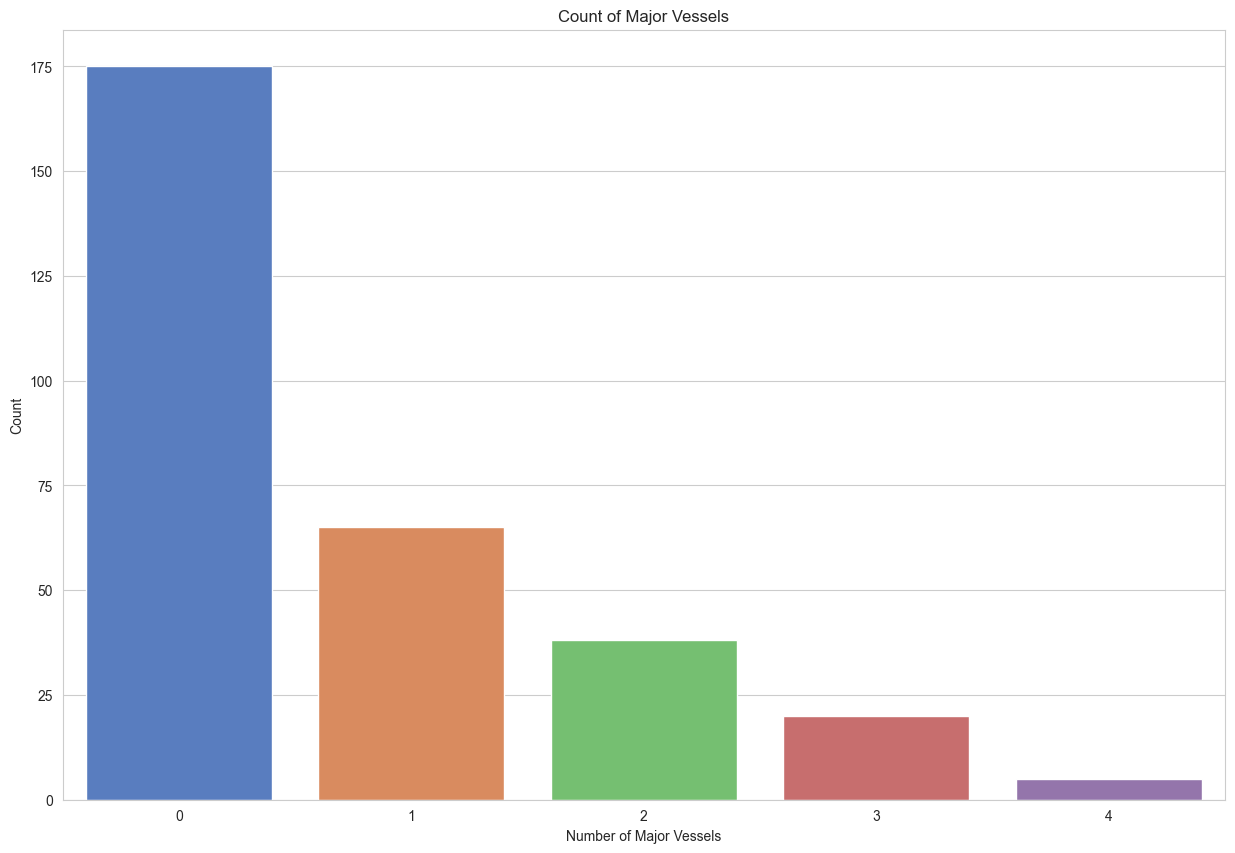

In [52]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style with grid lines
sns.set_style("whitegrid")

# Create the bar plot
plt.figure(figsize=(15, 10))
sns.countplot(x=data["num_major_vessels"], palette="muted")
plt.xlabel("Number of Major Vessels")
plt.ylabel("Count")
plt.title("Count of Major Vessels")
plt.show()


### comparing with target

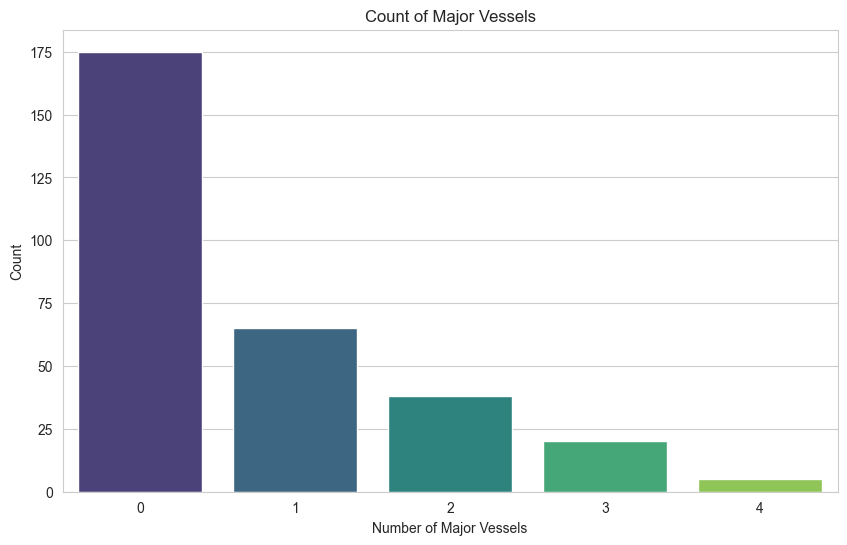

In [53]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style with grid lines
sns.set_style("whitegrid")

# Create the bar plot
plt.figure(figsize=(10, 6))
sns.countplot(x=data["num_major_vessels"], palette="viridis")
plt.xlabel("Number of Major Vessels")
plt.ylabel("Count")
plt.title("Count of Major Vessels")
plt.show()


### num_major_vessels=4 has astonishingly large number of heart patients

# Analysing A blood disorder called thalassemia (3 = normal; 6 = fixed defect; 7 = reversable defect)



In [54]:
data["thalassemia"].unique()

array([1, 2, 3, 0], dtype=int64)

### plotting the thalassemia distribution (0,1,2,3)

<Axes: xlabel='thalassemia', ylabel='Density'>

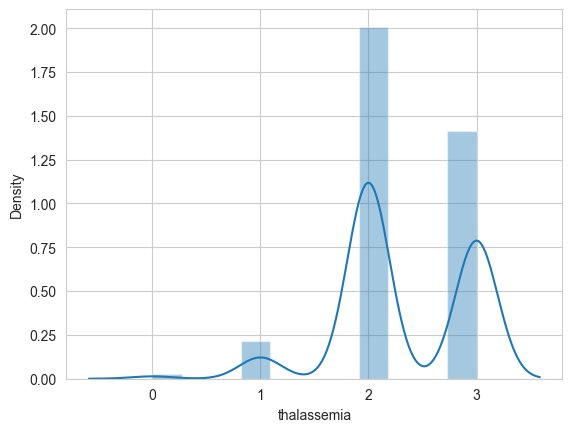

In [55]:
sns.distplot(data["thalassemia"])

### comparing with target

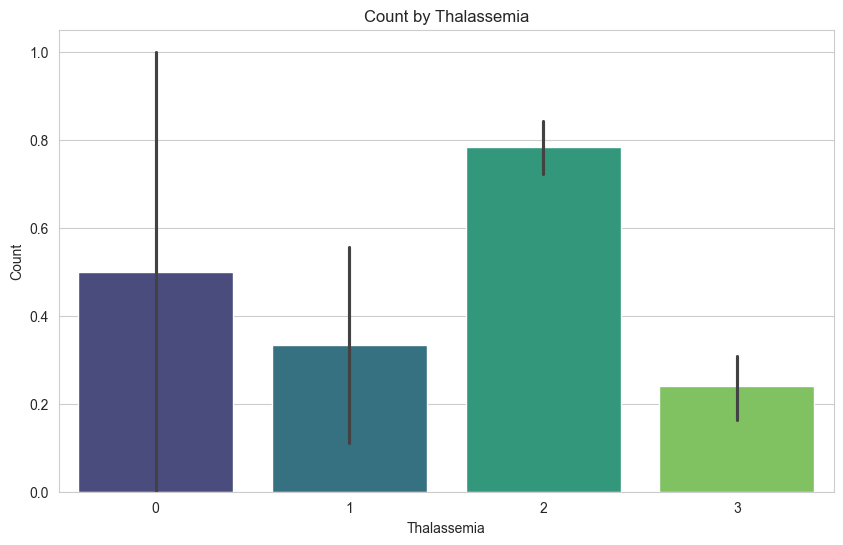

In [56]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame containing the dataset

# Set the style with grid lines
sns.set_style("whitegrid")

# Create the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=data["thalassemia"], y=y, palette="viridis")
plt.xlabel("Thalassemia")
plt.ylabel("Count")
plt.title("Count by Thalassemia")
plt.show()


# thalassemia and cholesterol scatterplot

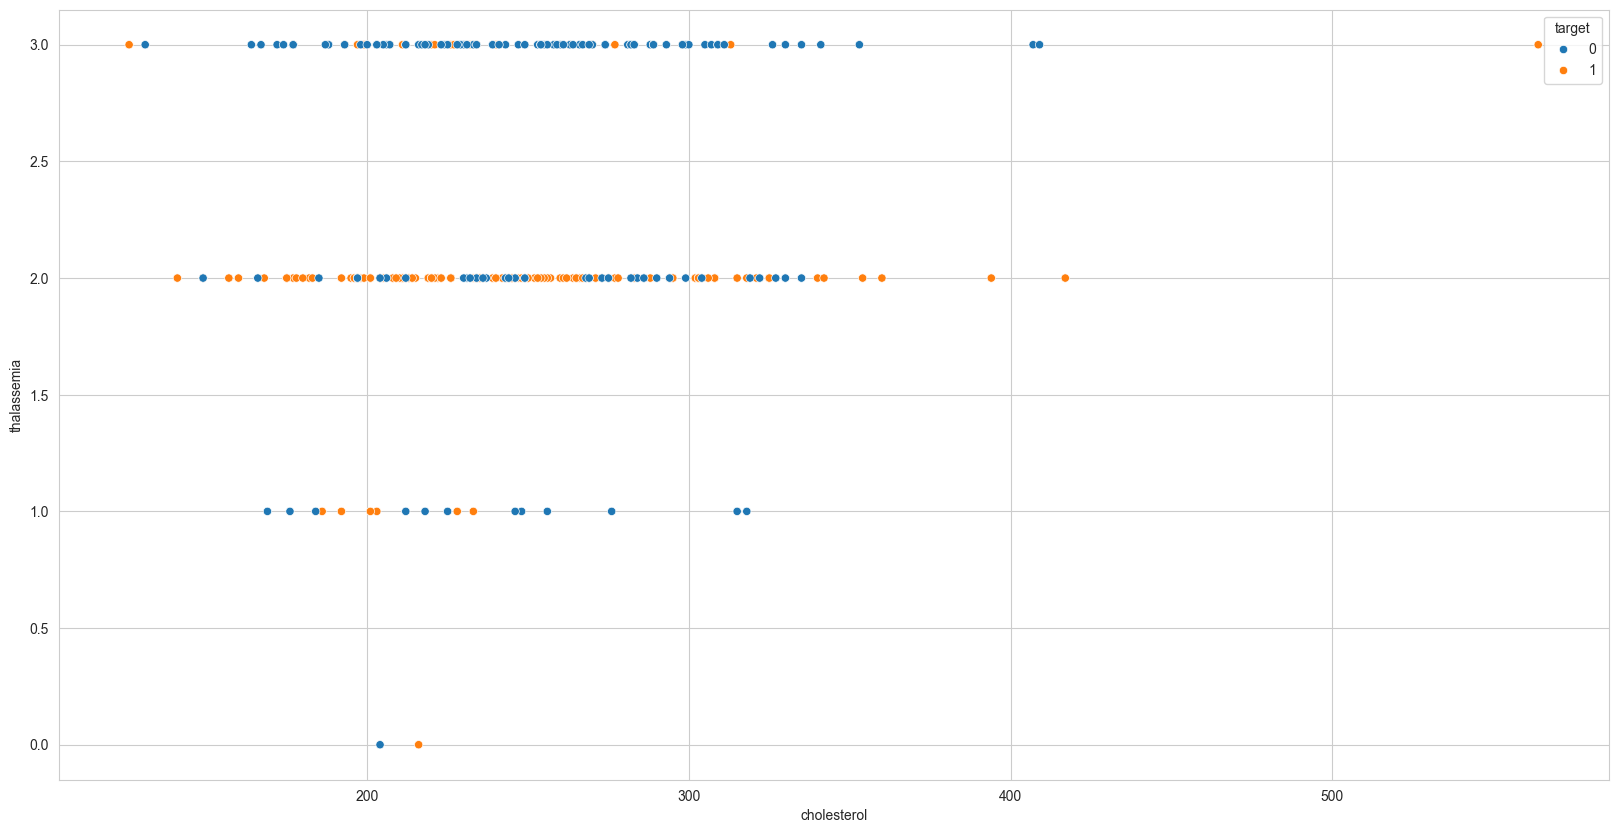

In [57]:
plt.figure(figsize=(20,10))
sns.scatterplot(x='cholesterol',y='thalassemia',data=data,hue='target')
plt.show()

# thalassemia vs resting blood pressure scatterplot

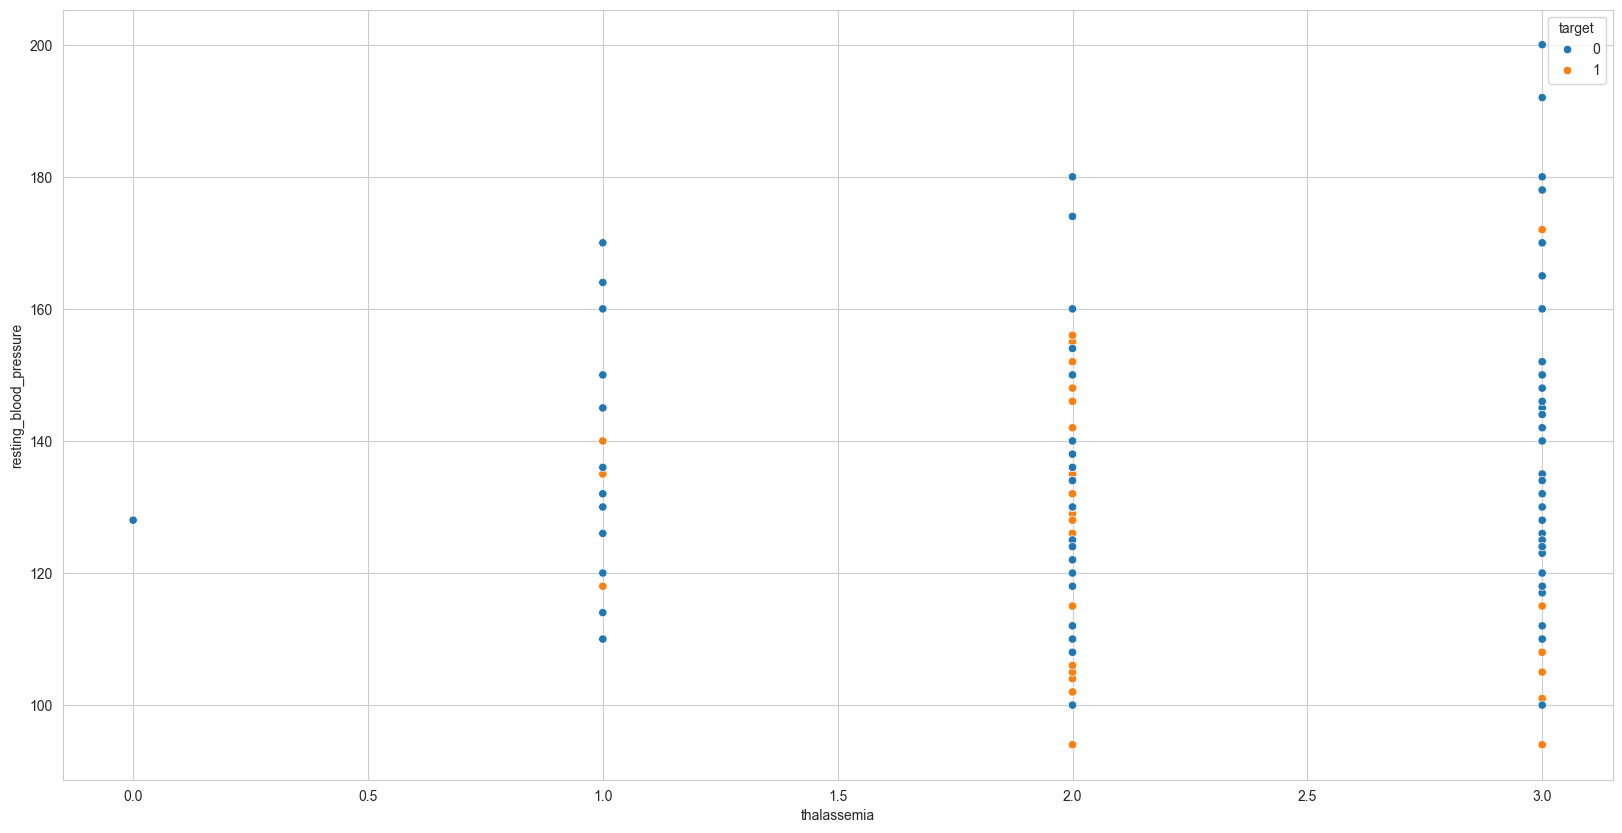

In [58]:
plt.figure(figsize=(20,10))
sns.scatterplot(x='thalassemia',y='resting_blood_pressure',data=data,hue='target')
plt.show()

## Health rate vs age

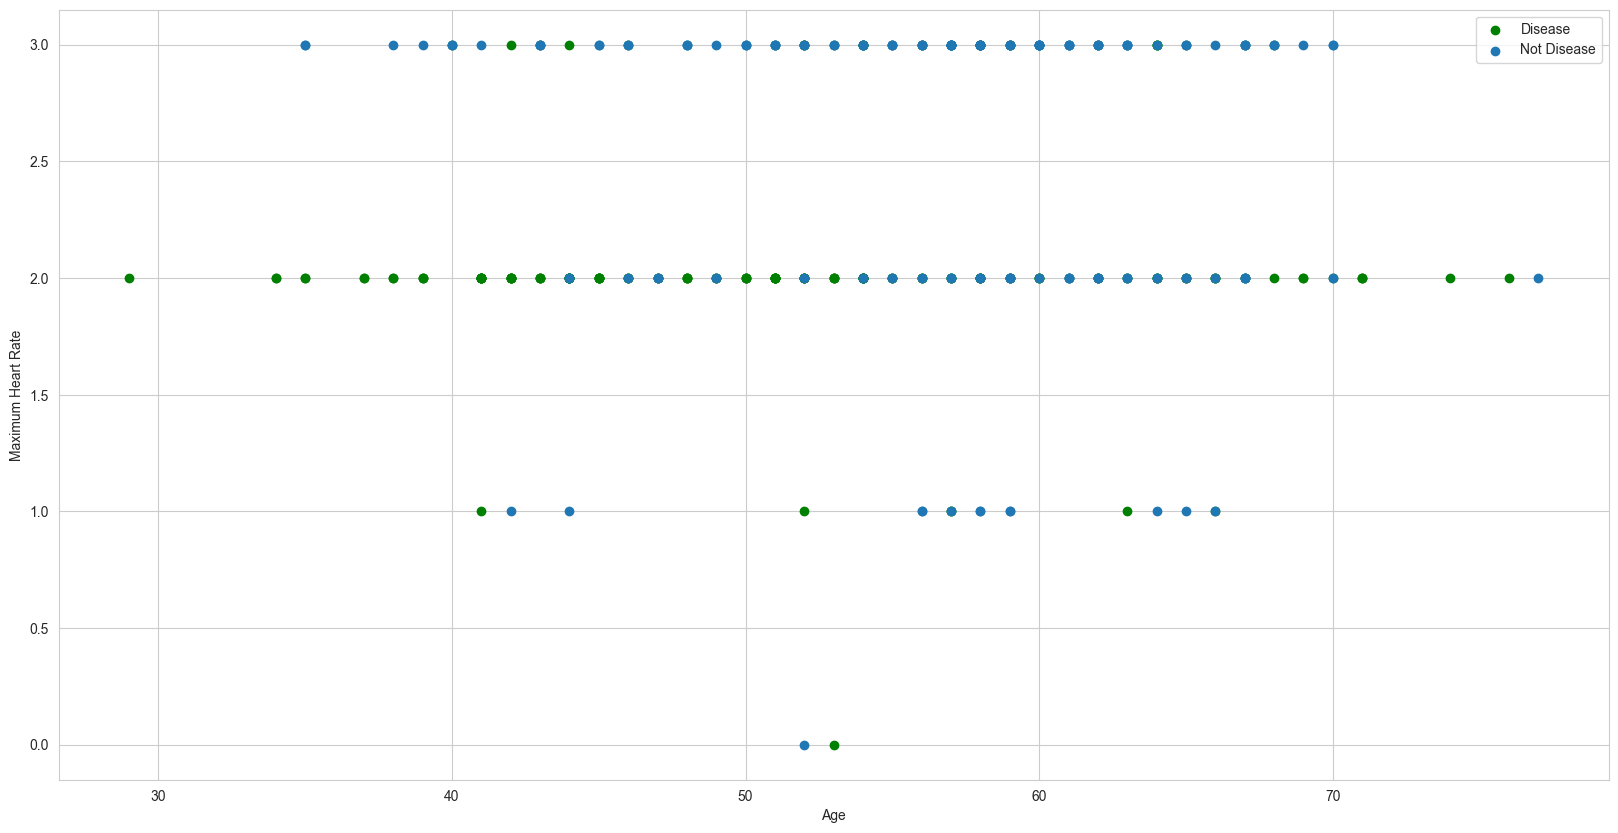

In [59]:
plt.figure(figsize=(20, 10))
plt.scatter(x=data.age[data.target==1], y=data.thalassemia[(data.target==1)], c="green")
plt.scatter(x=data.age[data.target==0], y=data.thalassemia[(data.target==0)])
plt.legend(["Disease", "Not Disease"])
plt.xlabel("Age")
plt.ylabel("Maximum Heart Rate")
plt.show()

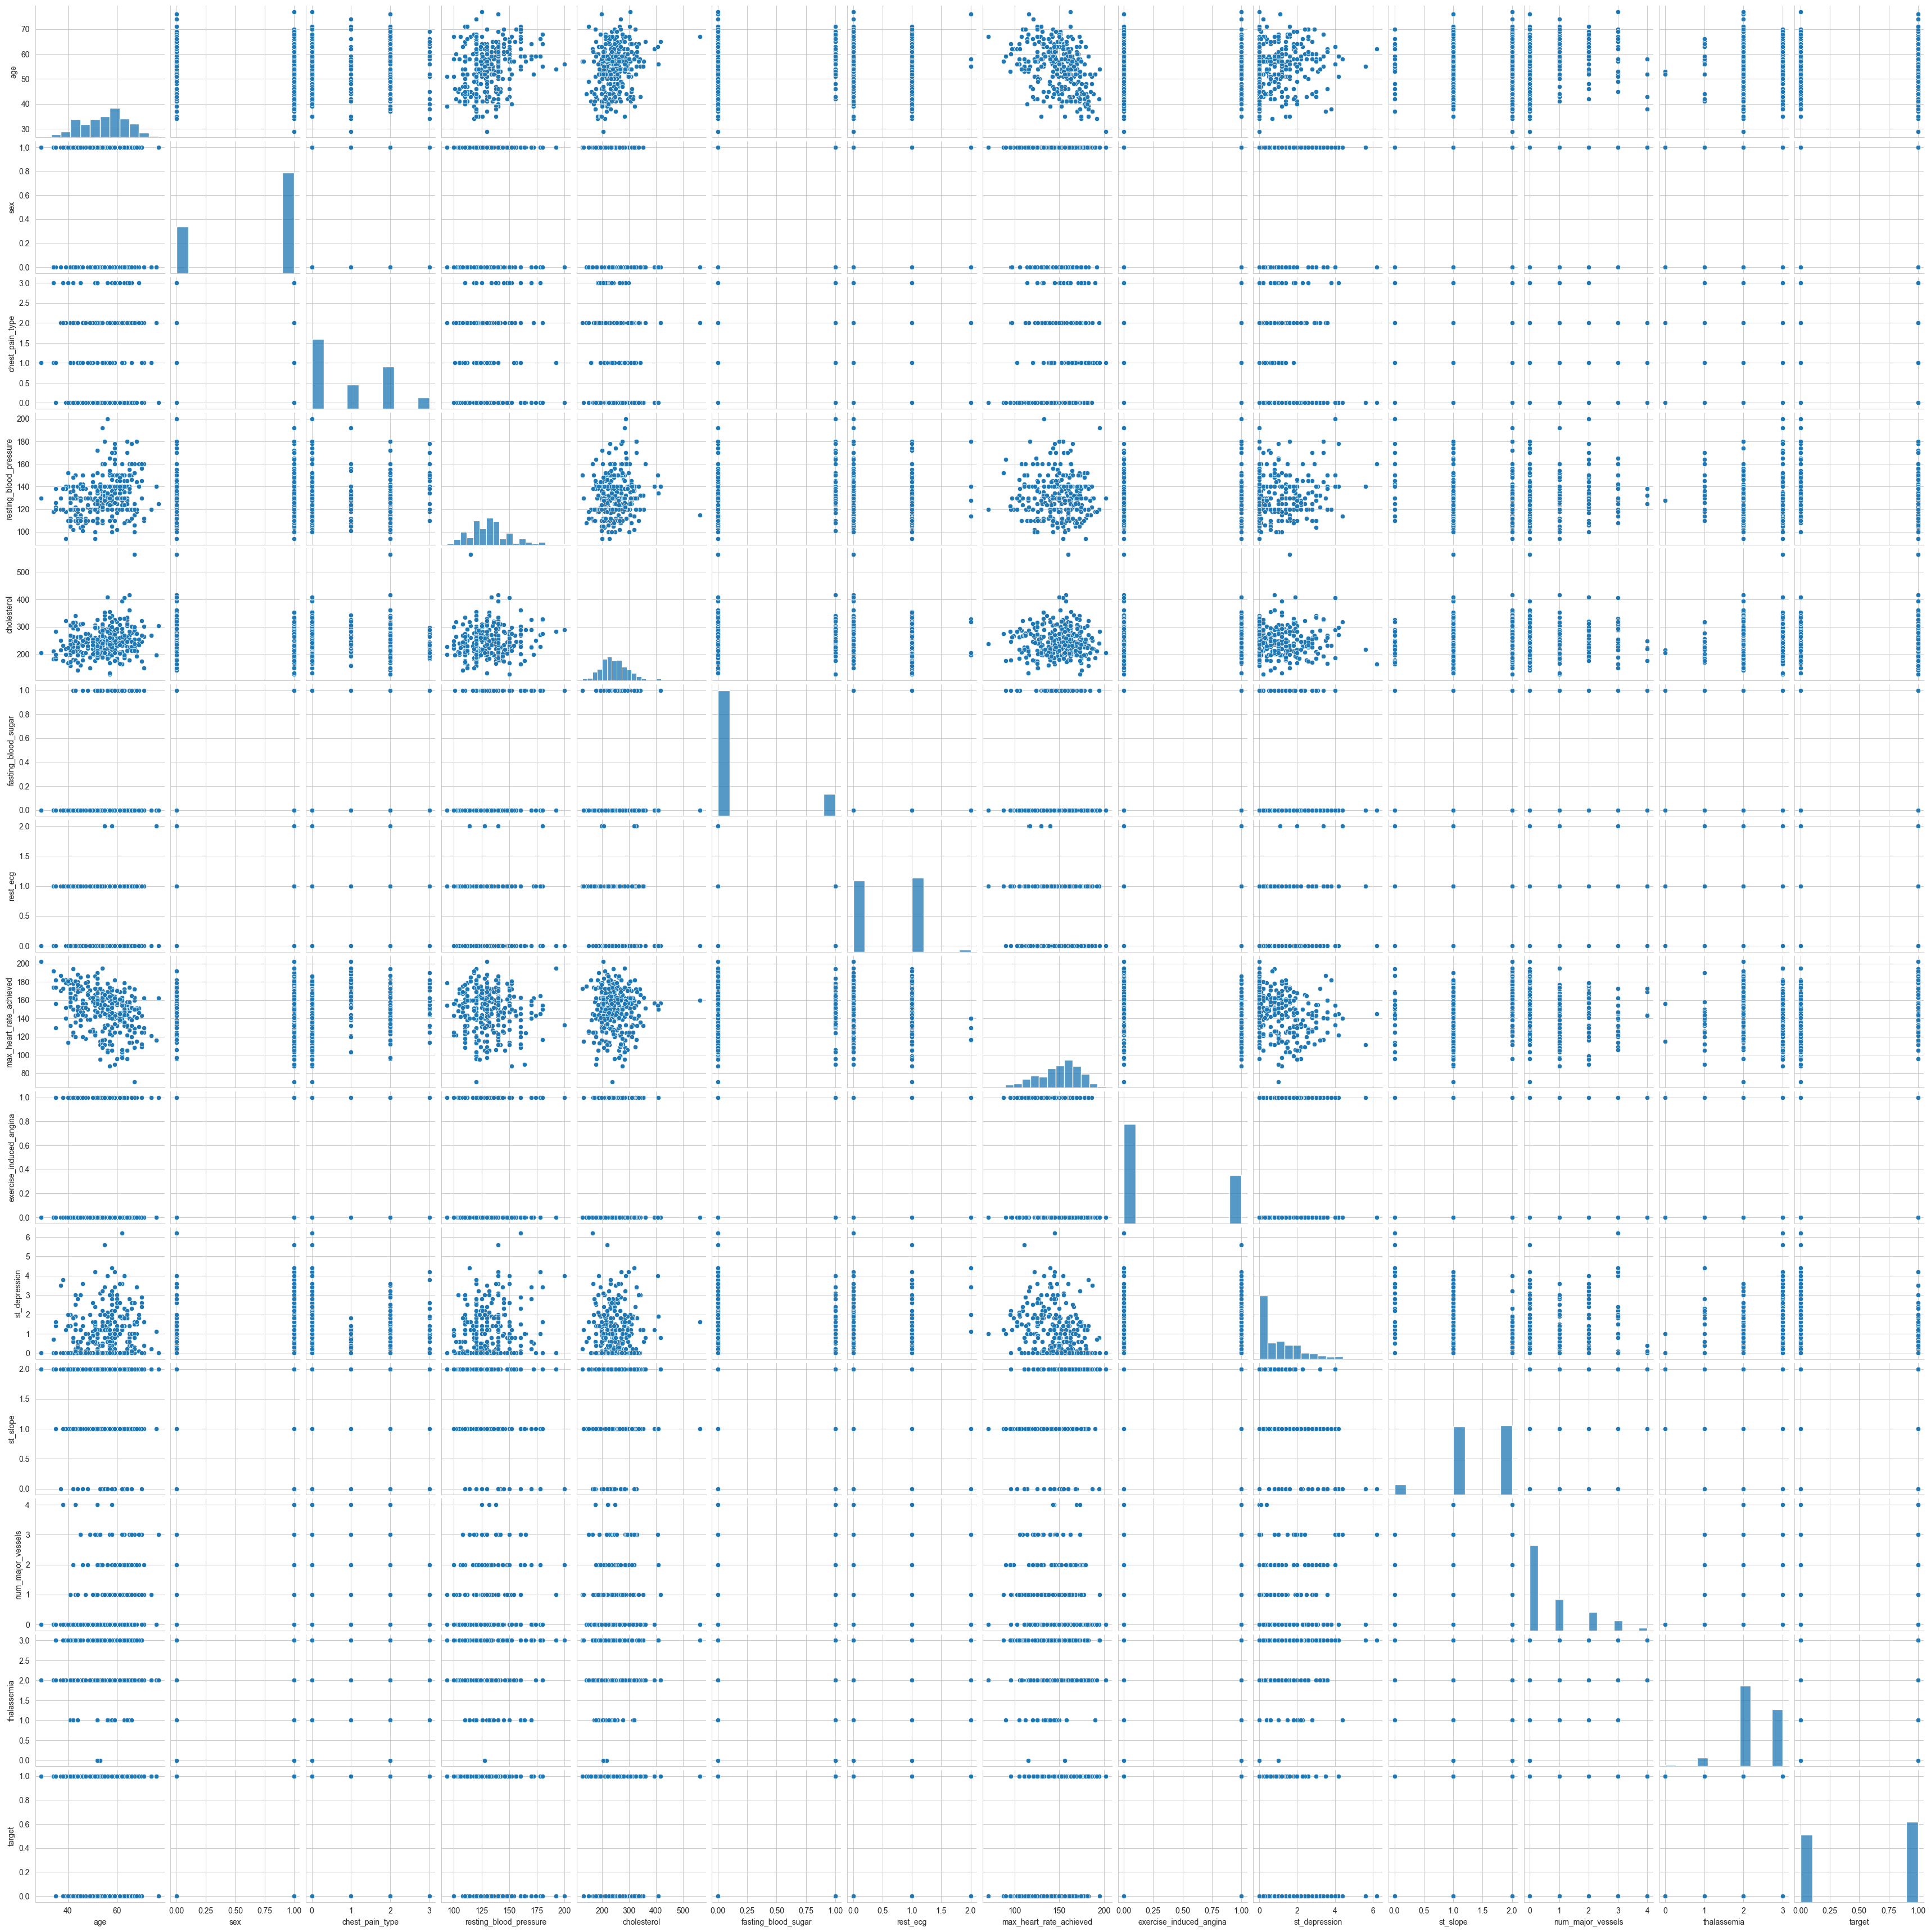

In [60]:
sns.pairplot(data=data)

array([[<Axes: title={'center': 'age'}>, <Axes: title={'center': 'sex'}>,
        <Axes: title={'center': 'chest_pain_type'}>,
        <Axes: title={'center': 'resting_blood_pressure'}>],
       [<Axes: title={'center': 'cholesterol'}>,
        <Axes: title={'center': 'fasting_blood_sugar'}>,
        <Axes: title={'center': 'rest_ecg'}>,
        <Axes: title={'center': 'max_heart_rate_achieved'}>],
       [<Axes: title={'center': 'exercise_induced_angina'}>,
        <Axes: title={'center': 'st_depression'}>,
        <Axes: title={'center': 'st_slope'}>,
        <Axes: title={'center': 'num_major_vessels'}>],
       [<Axes: title={'center': 'thalassemia'}>,
        <Axes: title={'center': 'target'}>, <Axes: >, <Axes: >]],
      dtype=object)

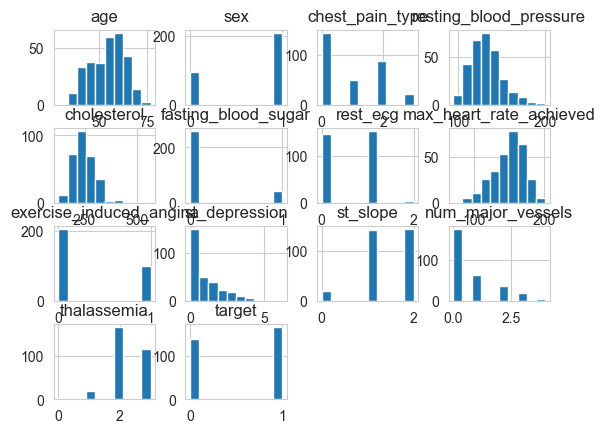

In [61]:
data.hist()

# Correlation plot

Correlation analysis is a method of statistical evaluation used to study the strength of a relationship between two, numerically measured, continuous variables (e.g. height and weight)

In [62]:
# store numeric variables in cnames
cnames=['age','resting_blood_pressure','cholesterol','max_heart_rate_achieved','st_depression','num_major_vessels']

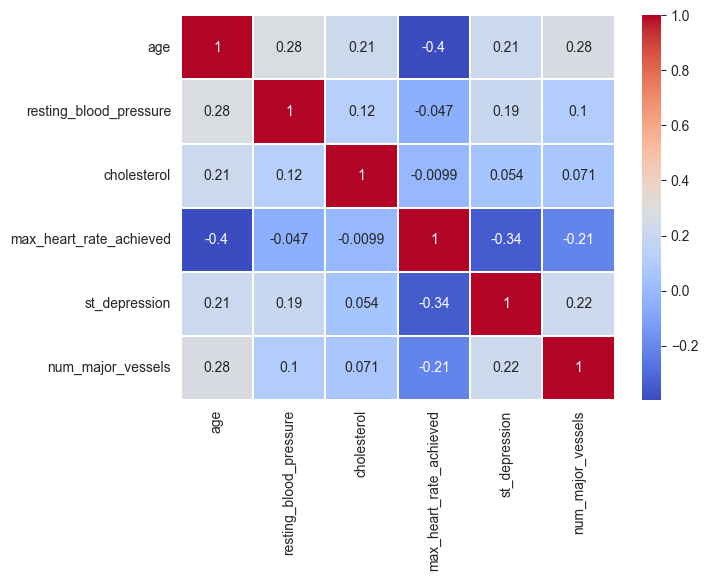

In [63]:
#Set the width and height of the plot
f, ax = plt.subplots(figsize=(7, 5))

#Correlation plot
df_corr = data.loc[:,cnames]
#Generate correlation matrix
corr = df_corr.corr()

#Plot using seaborn library
sns.heatmap(corr, annot = True, cmap='coolwarm',linewidths=.1)
plt.show()

##Correlation analysis

In [64]:
df_corr = data.loc[:,cnames]
df_corr

,age,resting_blood_pressure,cholesterol,max_heart_rate_achieved,st_depression,num_major_vessels
0,63,145,233,150,2.3,0
1,37,130,250,187,3.5,0
2,41,130,204,172,1.4,0
3,56,120,236,178,0.8,0
4,57,120,354,163,0.6,0
...,...,...,...,...,...,...
298,57,140,241,123,0.2,0
299,45,110,264,132,1.2,0
300,68,144,193,141,3.4,2
301,57,130,131,115,1.2,1


# Splitting the dataset to Train and Test

In [65]:
from sklearn.model_selection import train_test_split

predictors = data.drop("target",axis=1)
target = data["target"]

X_train,X_test,Y_train,Y_test = train_test_split(predictors,target,test_size=0.20,random_state=0)
print("Training features have {0} records and Testing features have {1} records.".\
      format(X_train.shape[0], X_test.shape[0]))

Training features have 242 records and Testing features have 61 records.


In [66]:
X_train.shape

(242, 13)

In [67]:
X_test.shape

(61, 13)

In [68]:
Y_train.shape

(242,)

In [69]:
Y_test.shape

(61,)

## importing Accuracy score

In [70]:
from sklearn.metrics import accuracy_score

# Modelling and predicting with Machine Learning
The main goal of the entire project is to predict heart disease occurrence with the highest accuracy. In order to achieve this, we will test several classification algorithms. This section includes all results obtained from the study and introduces the best performer according to accuracy metric. I have chosen several algorithms typical for solving supervised learning problems throughout classification methods.

First of all, let's equip ourselves with a handy tool that benefits from the cohesion of SciKit Learn library and formulate a general function for training our models. The reason for displaying accuracy on both, train and test sets, is to allow us to evaluate whether the model overfits or underfits the data (so-called bias/variance tradeoff).

In [71]:
def train_model(X_train, y_train, X_test, y_test, classifier, **kwargs):
    
    """
    Fit the chosen model and print out the score.
    
    """
    
    # instantiate model
    model = classifier(**kwargs)
    
    # train model
    model.fit(X_train,y_train)
    
    # check accuracy and print out the results
    fit_accuracy = model.score(X_train, y_train)
    test_accuracy = model.score(X_test, y_test)
    
    print(f"Train accuracy: {fit_accuracy:0.2%}")
    print(f"Test accuracy: {test_accuracy:0.2%}")
    
    return model

# Logistic regression

In [72]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

logreg.fit(X_train, Y_train)

y_pred_lr = logreg.predict(X_test)
print(y_pred_lr)

[0 1 1 0 0 0 0 0 0 0 1 1 0 1 1 1 0 1 0 1 1 0 0 0 1 0 0 0 1 1 1 0 1 1 1 1 0
 1 0 0 1 1 0 0 0 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1]


In [73]:
score_lr = round(accuracy_score(y_pred_lr,Y_test)*100,2)

print("The accuracy score achieved using Logistic Regression is: "+str(score_lr)+" %")

The accuracy score achieved using Logistic Regression is: 85.25 %


In [74]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
model = train_model(X_train, Y_train, X_test, Y_test, LogisticRegression)

Train accuracy: 84.30%
Test accuracy: 85.25%


In [75]:
# Logistic Regression supports only solvers in ['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga']
clf = LogisticRegression(random_state=0, solver='newton-cg',
                         multi_class='multinomial').fit(X_test, Y_test)

# The solver for weight optimization.
# 'lbfgs' is an optimizer in the family of quasi-Newton methods.
clf.score(X_test, Y_test)


0.9344262295081968

# Confusion Matrix

In [76]:
from sklearn.metrics import confusion_matrix

In [77]:
matrix= confusion_matrix(Y_test, y_pred_lr)

<Axes: >

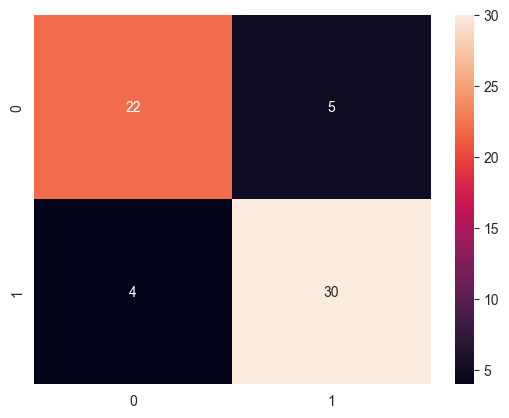

In [78]:
sns.heatmap(matrix,annot = True, fmt = "d")

fmt = d is format = default

# precision Score

In [79]:
from sklearn.metrics import precision_score

In [80]:
precision = precision_score(Y_test, y_pred_lr)

In [81]:
print("Precision: ",precision)

Precision:  0.8571428571428571


# Recall

In [82]:
from sklearn.metrics import recall_score

In [83]:
recall = recall_score(Y_test, y_pred_lr)

In [84]:
print("Recall is: ",recall)

Recall is:  0.8823529411764706




---



# F-Score

balance of precision and recall score

In [85]:
print((2*precision*recall)/(precision+recall))

0.8695652173913043


cm using bad style

In [86]:
CM =pd.crosstab(Y_test, y_pred_lr)
CM

col_0,0,1
target,,
0,22,5
1,4,30


In [87]:
TN=CM.iloc[0,0]
FP=CM.iloc[0,1]
FN=CM.iloc[1,0]
TP=CM.iloc[1,1]

false negative

In [88]:
fnr=FN*100/(FN+TP)
fnr

11.764705882352942

# Random Forest

In [89]:
from sklearn.ensemble import RandomForestClassifier
randfor = RandomForestClassifier(n_estimators=100, random_state=0)

randfor.fit(X_train, Y_train)

y_pred_rf = randfor.predict(X_test)
print(y_pred_rf)

[0 0 0 0 0 1 0 0 0 0 1 1 0 1 1 1 0 1 0 1 1 0 0 0 1 0 0 0 1 1 1 0 1 1 1 0 0
 1 0 0 1 1 1 0 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1]


# Learning curve for Training score & cross validation score

In [91]:
# from sklearn.model_selection import learning_curve
# # Create CV training and test scores for various training set sizes
# train_sizes, train_scores, test_scores = learning_curve(RandomForestClassifier(), 
#                                                         X_train, 
#                                                         Y_train,
#                                                         # Number of folds in cross-validation
#                                                         cv=10,
#                                                         # Evaluation metric
#                                                         scoring='accuracy',
#                                                         # Use all computer cores
#                                                         n_jobs=-1, 
#                                                         # 50 different sizes of the training set
#                                                         train_sizes=np.linspace(0.01, 1.0, 50))

# # Create means and standard deviations of training set scores
# train_mean = np.mean(train_scores, axis=1)
# train_std = np.std(train_scores, axis=1)

# # Create means and standard deviations of test set scores
# test_mean = np.mean(test_scores, axis=1)
# test_std = np.std(test_scores, axis=1)

# # Draw lines
# plt.plot(train_sizes, train_mean, '--', color="#111111",  label="Training score")
# plt.plot(train_sizes, test_mean, color="#111111", label="Cross-validation score")

# # Draw bands
# plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="#DDDDDD")
# plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="#DDDDDD")

# # Create plot
# plt.title("Learning Curve")
# plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
# plt.tight_layout()
# plt.show()


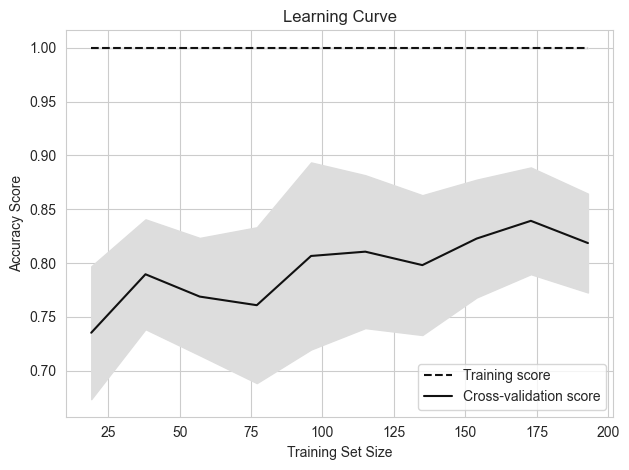

In [92]:
from sklearn.model_selection import learning_curve
from sklearn.ensemble import RandomForestClassifier
import numpy as np
import matplotlib.pyplot as plt

# Reduce the number of training set sizes (e.g., from 50 to 10)
train_sizes, train_scores, test_scores = learning_curve(RandomForestClassifier(), 
                                                        X_train, 
                                                        Y_train,
                                                        cv=5,  # Reduce the number of folds
                                                        scoring='accuracy',
                                                        n_jobs=2,  # Limit the number of cores used
                                                        train_sizes=np.linspace(0.1, 1.0, 10))  # Use fewer sizes

# Create means and standard deviations of training set scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

# Create means and standard deviations of test set scores
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Draw lines
plt.plot(train_sizes, train_mean, '--', color="#111111",  label="Training score")
plt.plot(train_sizes, test_mean, color="#111111", label="Cross-validation score")

# Draw bands
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="#DDDDDD")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="#DDDDDD")

# Create plot
plt.title("Learning Curve")
plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show()


In [93]:
#Random forest with 100 trees
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, random_state=0)
rf.fit(X_train, Y_train)
print("Accuracy on training set: {:.3f}".format(rf.score(X_train, Y_train)))
print("Accuracy on test set: {:.3f}".format(rf.score(X_test, Y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.885


Now, let us prune the depth of trees and check the accuracy.

In [94]:
rf1 = RandomForestClassifier(max_depth=3, n_estimators=100, random_state=0)
rf1.fit(X_train, Y_train)
print("Accuracy on training set: {:.3f}".format(rf1.score(X_train, Y_train)))
print("Accuracy on test set: {:.3f}".format(rf1.score(X_test, Y_test)))

Accuracy on training set: 0.876
Accuracy on test set: 0.869


performance metrics
-Accuracy: is the ratio between the number of correct predictions and total number of predications.

$acc = \frac{TP + TN}{TP + TN + FP + FN}$

-Precision: is the ratio between the number of correct positives and the number of true positives plus the number of false positives.

$Precision (p) = \frac{TP}{TP + FP}$

-Recall: is the ratio between the number of correct positives and the number of true positives plus the number of false negatives.

$recall = \frac{TP}{TP + FN}$

-F-score: is known as the harmonic mean of precision and recall.

$acc = \frac{1}{\frac{1}{2}(\frac{1}{p}+\frac{1}{r})} = \frac{2pr}{p+r}$

-Problem characteristics in context of our case study:

TP = True positive (has heart disease). TN = True negative (has no heart disease). FP = False positive (has no heart disease) FN = False negative (has heart disease)

## confusion matrix of Random Forest

In [95]:
from sklearn.metrics import confusion_matrix

In [96]:
matrix= confusion_matrix(Y_test, y_pred_rf)

<Axes: >

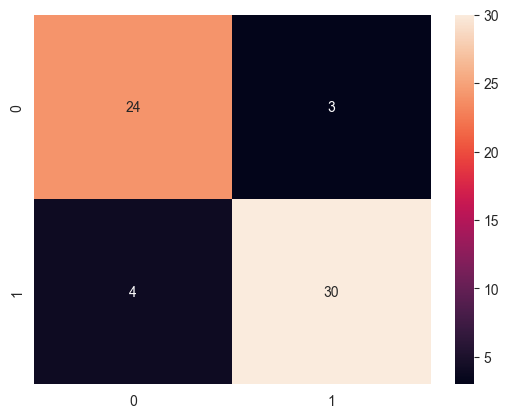

In [97]:
sns.heatmap(matrix,annot = True, fmt = "d")

# precision score

In [98]:
from sklearn.metrics import precision_score

In [99]:
precision = precision_score(Y_test, y_pred_rf)

In [100]:
print("Precision: ",precision)

Precision:  0.9090909090909091


# recall

In [101]:
from sklearn.metrics import recall_score

In [102]:
recall = recall_score(Y_test, y_pred_rf)

In [103]:
print("Recall is: ",recall)

Recall is:  0.8823529411764706


# F score

In [104]:
print((2*precision*recall)/(precision+recall))

0.8955223880597014


### cm using bad style

In [105]:
CM =pd.crosstab(Y_test, y_pred_rf)
CM

col_0,0,1
target,,
0,24,3
1,4,30


In [106]:
TN=CM.iloc[0,0]
FP=CM.iloc[0,1]
FN=CM.iloc[1,0]
TP=CM.iloc[1,1]

## False negative rate of the model

In [107]:
fnr=FN*100/(FN+TP)
fnr

11.764705882352942

# Naive Bayes

In [108]:
from sklearn.naive_bayes import GaussianNB
nb = train_model(X_train, Y_train, X_test, Y_test, GaussianNB)

nb.fit(X_train, Y_train)

y_pred_nb = nb.predict(X_test)
print(y_pred_nb)

Train accuracy: 83.47%
Test accuracy: 85.25%
[0 1 1 0 0 1 0 0 0 0 1 1 0 1 1 1 0 1 0 1 1 1 0 0 1 0 0 1 1 1 0 0 1 1 1 0 0
 1 0 0 1 1 0 0 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1]


In [109]:
score_nb = round(accuracy_score(y_pred_nb,Y_test)*100,2)

print("The accuracy score achieved using Naive Bayes is: "+str(score_nb)+" %")

The accuracy score achieved using Naive Bayes is: 85.25 %


In [110]:
#Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB
model = train_model(X_train, Y_train, X_test, Y_test, GaussianNB)

Train accuracy: 83.47%
Test accuracy: 85.25%


## confusion matrix of Naive Bayes

In [111]:
from sklearn.metrics import confusion_matrix

In [112]:
matrix= confusion_matrix(Y_test, y_pred_nb)

<Axes: >

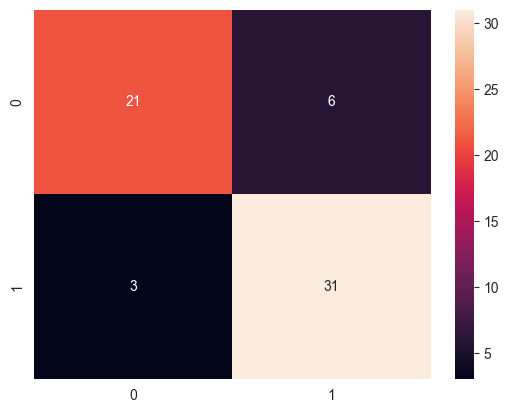

In [113]:
sns.heatmap(matrix,annot = True, fmt = "d")

# precision score

In [114]:
from sklearn.metrics import precision_score

In [115]:
precision = precision_score(Y_test, y_pred_nb)

In [116]:
print("Precision: ",precision)

Precision:  0.8378378378378378


# recall

In [117]:
from sklearn.metrics import recall_score

In [118]:
recall = recall_score(Y_test, y_pred_nb)

In [119]:
print("Recall is: ",recall)

Recall is:  0.9117647058823529


# f score

In [120]:
print((2*precision*recall)/(precision+recall))

0.8732394366197184


### bad cm style

In [121]:
CM = pd.crosstab(Y_test, y_pred_nb)
CM

col_0,0,1
target,,
0,21,6
1,3,31


In [122]:
TN=CM.iloc[0,0]
FP=CM.iloc[0,1]
FN=CM.iloc[1,0]
TP=CM.iloc[1,1]

## false negative rate of the model

In [123]:
fnr = FN*100/(FN+TP)
fnr

8.823529411764707

# KNN(K Nearest Neighbors)

In [124]:
from sklearn.neighbors import KNeighborsClassifier
knn = train_model(X_train, Y_train, X_test, Y_test, KNeighborsClassifier, n_neighbors=8)

knn.fit(X_train, Y_train)

y_pred_knn = knn.predict(X_test)
print(y_pred_knn)

Train accuracy: 71.90%
Test accuracy: 68.85%
[0 0 1 0 1 1 0 0 0 0 1 1 0 1 1 1 0 1 0 1 1 1 0 0 0 0 1 0 1 1 0 0 1 0 1 0 0
 1 0 1 0 1 1 0 0 1 1 1 1 1 1 0 1 0 1 0 0 1 0 1 0]


In [125]:
score_knn = round(accuracy_score(y_pred_knn,Y_test)*100,2)

print("The accuracy score achieved using KNN is: "+str(score_knn)+" %")

The accuracy score achieved using KNN is: 68.85 %


In [126]:
# KNN
from sklearn.neighbors import KNeighborsClassifier
model = train_model(X_train, Y_train, X_test, Y_test, KNeighborsClassifier)

Train accuracy: 78.10%
Test accuracy: 63.93%


Let's see if KNN can perform even better by trying different 'n_neighbours' inputs.

In [127]:
# Seek optimal 'n_neighbours' parameter
for i in range(1,10):
    print("n_neigbors = "+str(i))
    train_model(X_train, Y_train, X_test, Y_test, KNeighborsClassifier, n_neighbors=i)

n_neigbors = 1
Train accuracy: 100.00%
Test accuracy: 52.46%
n_neigbors = 2
Train accuracy: 79.75%
Test accuracy: 60.66%
n_neigbors = 3
Train accuracy: 78.10%
Test accuracy: 63.93%
n_neigbors = 4
Train accuracy: 76.03%
Test accuracy: 63.93%
n_neigbors = 5
Train accuracy: 78.10%
Test accuracy: 63.93%
n_neigbors = 6
Train accuracy: 74.38%
Test accuracy: 65.57%
n_neigbors = 7
Train accuracy: 72.31%
Test accuracy: 67.21%
n_neigbors = 8
Train accuracy: 71.90%
Test accuracy: 68.85%
n_neigbors = 9
Train accuracy: 73.14%
Test accuracy: 67.21%


It turns out that value of n_neighbours (8) is optimal.

## Confusion matrix

In [128]:
from sklearn.metrics import confusion_matrix

In [129]:
matrix= confusion_matrix(Y_test, y_pred_knn)

<Axes: >

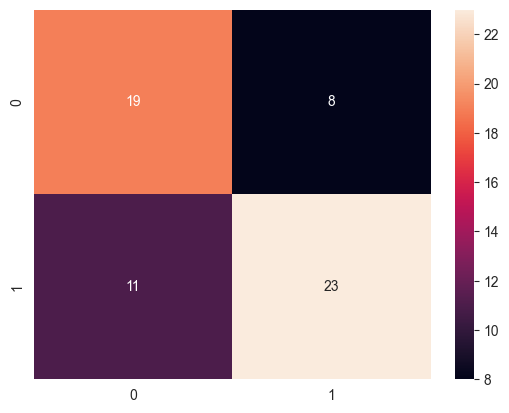

In [130]:
sns.heatmap(matrix,annot = True, fmt = "d")

# precision score

In [131]:
from sklearn.metrics import precision_score

In [132]:
precision = precision_score(Y_test, y_pred_knn)

In [133]:
print("Precision: ",precision)

Precision:  0.7419354838709677


# recall

In [134]:
from sklearn.metrics import recall_score

In [135]:
recall = recall_score(Y_test, y_pred_knn)

In [136]:
print("Recall is: ",recall)

Recall is:  0.6764705882352942


# f score

In [137]:
print((2*precision*recall)/(precision+recall))

0.7076923076923077


### bad cm

In [138]:
CM = pd.crosstab(Y_test, y_pred_knn)
CM

col_0,0,1
target,,
0,19,8
1,11,23


In [139]:
TN=CM.iloc[0,0]
FP=CM.iloc[0,1]
FN=CM.iloc[1,0]
TP=CM.iloc[1,1]

## false negative rate of the model

In [140]:
fnr = FN*100/(FN+TP)
fnr

32.35294117647059

## false negative rate

In [141]:
from sklearn.neighbors import KNeighborsClassifier

# Instantiate the KNeighborsClassifier with desired parameters
knn4 = KNeighborsClassifier(n_neighbors=4)

# Fit the classifier to the training data
knn4.fit(X_train, Y_train)  # Replace X_train and Y_train with your training data

# Now you can use knn4 for making predictions
Y_pred_knn4 = knn4.predict(X_test)  # Replace X_test with your test data


# Decision Tree

In [142]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(max_depth=3, random_state=0)

dt.fit(X_train, Y_train)

y_pred_dt = dt.predict(X_test)
print(y_pred_dt)

[0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 1 0 1 0 1 1 0 0 0 1 1 0 0 1 1 0 0 1 1 1 1 0
 1 0 0 1 0 1 0 1 0 1 1 0 1 1 1 1 1 1 0 1 1 0 1 1]


In [143]:
score_dt = round(accuracy_score(y_pred_dt,Y_test)*100,2)

print("The accuracy score achieved using Decision Tree is: "+str(score_dt)+" %")

The accuracy score achieved using Decision Tree is: 81.97 %


In [144]:
from sklearn.tree import DecisionTreeClassifier
tree1 = DecisionTreeClassifier(random_state=0)
tree1.fit(X_train, Y_train)
print("Accuracy on training set: {:.3f}".format(tree1.score(X_train, Y_train)))
print("Accuracy on test set: {:.3f}".format(tree1.score(X_test, Y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.787


The accuracy on the training set is 100%, while the test set accuracy is much worse. This is an indicative that the tree is overfitting and not generalizing well to new data. Therefore, we need to apply pre-pruning to the tree.

We set max_depth=3, limiting the depth of the tree decreases overfitting. This leads to a lower accuracy on the training set, but an improvement on the test set.

In [145]:
tree1 = DecisionTreeClassifier(max_depth=3, random_state=0)
tree1.fit(X_train, Y_train)
print("Accuracy on training set: {:.3f}".format(tree1.score(X_train, Y_train)))
print("Accuracy on test set: {:.3f}".format(tree1.score(X_test, Y_test)))

Accuracy on training set: 0.843
Accuracy on test set: 0.820


# Discision Tree Visualization

In [146]:
df = pd.read_csv('heart.csv')

In [147]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [148]:
pip install pydotplus


     ---------------------------------------- 0.0/278.7 kB ? eta -:--:--
     -- ---------------------------------- 20.5/278.7 kB 640.0 kB/s eta 0:00:01
     ---- -------------------------------- 30.7/278.7 kB 325.1 kB/s eta 0:00:01
     ---- -------------------------------- 30.7/278.7 kB 325.1 kB/s eta 0:00:01
     ------------ ------------------------ 92.2/278.7 kB 476.3 kB/s eta 0:00:01
     ------------------- ---------------- 153.6/278.7 kB 654.6 kB/s eta 0:00:01
     ------------------- ---------------- 153.6/278.7 kB 654.6 kB/s eta 0:00:01
     -----------------------------------  276.5/278.7 kB 850.6 kB/s eta 0:00:01
     ------------------------------------ 278.7/278.7 kB 818.4 kB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for pydotplus: filename=pydotplus-2.0.2-py3-none-any.whl size=24575 sha256=394b7b8ab9e80caee14707eaf5a3771a0adfba8b33c49b9694ab2d2434b87207
  Stored in directory: c:\use


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [149]:
from pandas import DataFrame, Series
from IPython.display import Image 
from io import StringIO
import pydotplus
from sklearn import preprocessing

In [150]:
def plot_decision_tree(clf,feature_name,target_name):
    dot_data = StringIO()  
    tree.export_graphviz(clf, out_file=dot_data,  
                         feature_names=feature_name,    
                         filled=True, rounded=True,  
                         special_characters=True)  
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
    return Image(graph.create_png())

In [151]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train,Y_train)

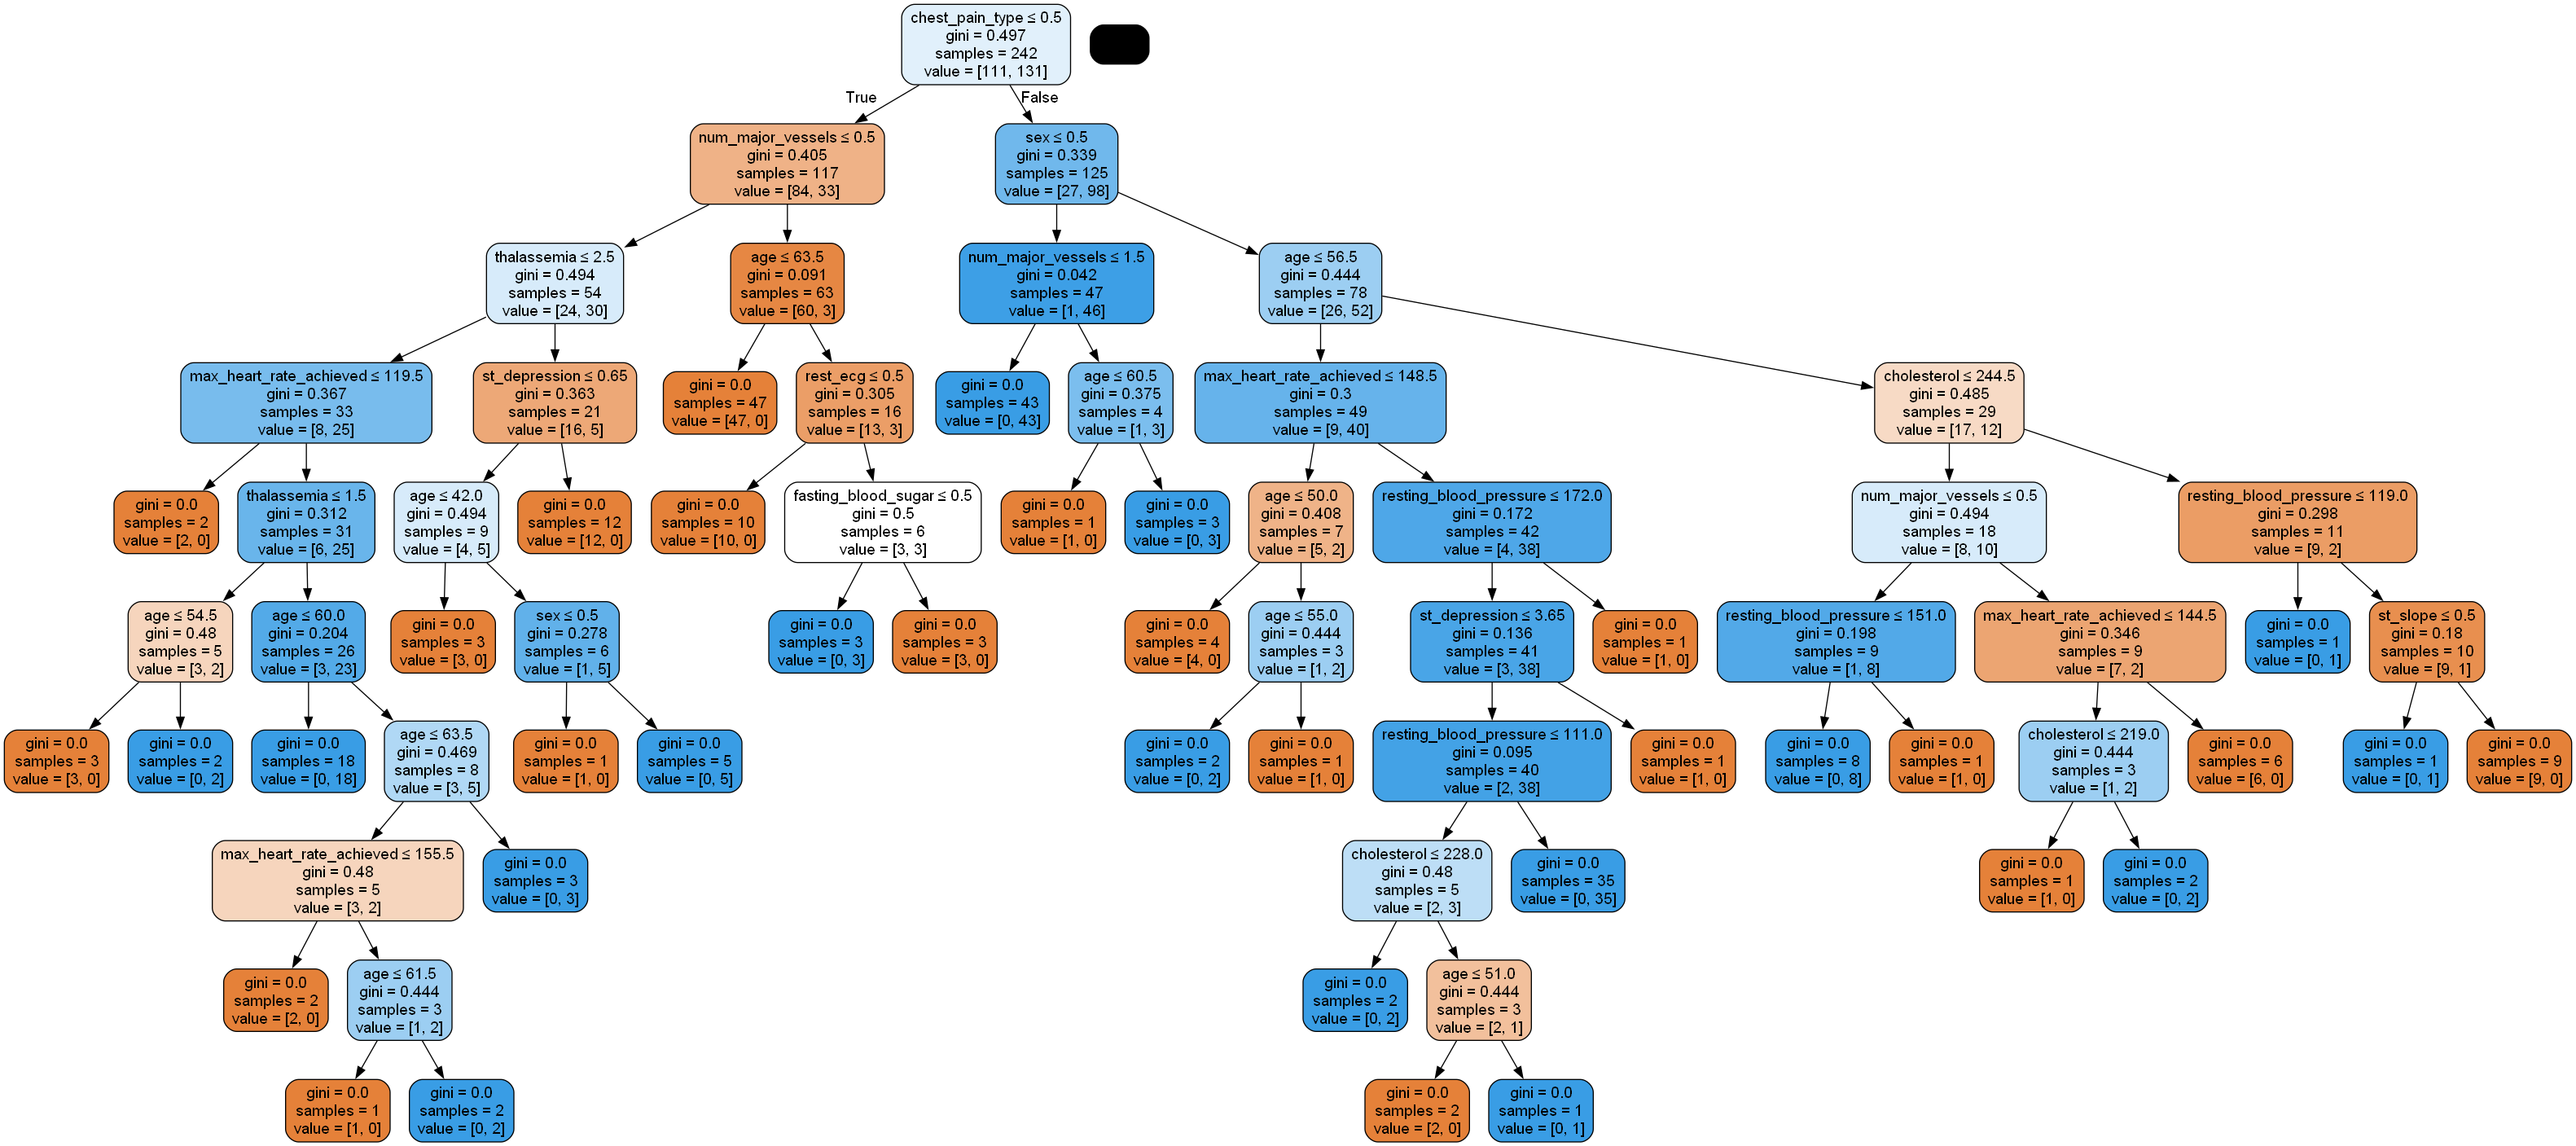

In [152]:
plot_decision_tree(clf, X_train.columns,df.columns[1])

# Depth 1

In [153]:
from sklearn import tree
HOW_DEEP_TREES = 1
clf = tree.DecisionTreeClassifier(random_state=0, max_depth=HOW_DEEP_TREES)
clf = clf.fit(X_train, Y_train)
clf

DecisionTreeClassifier(max_depth=1, random_state=0)

In [154]:
from sklearn.tree import DecisionTreeClassifier

# Create a DecisionTreeClassifier instance
clf = DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=1,
                             max_features=None, max_leaf_nodes=None,
                             min_impurity_decrease=0.0,
                             min_samples_leaf=1, min_samples_split=2,
                             min_weight_fraction_leaf=0.0, random_state=0,
                             splitter='best')


In [155]:
from sklearn.tree import DecisionTreeClassifier

# Create a DecisionTreeClassifier instance
clf = DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=1,
                             max_features=None, max_leaf_nodes=None,
                             min_impurity_decrease=0.0,
                             min_samples_leaf=1, min_samples_split=2,
                             min_weight_fraction_leaf=0.0, random_state=0,
                             splitter='best')

# Fit the classifier with training data
clf.fit(X_train, Y_train)


DecisionTreeClassifier(max_depth=1, random_state=0)

## Confusion Matrix

In [156]:
from sklearn.metrics import confusion_matrix

In [157]:
matrix= confusion_matrix(Y_test, y_pred_dt)

<Axes: >

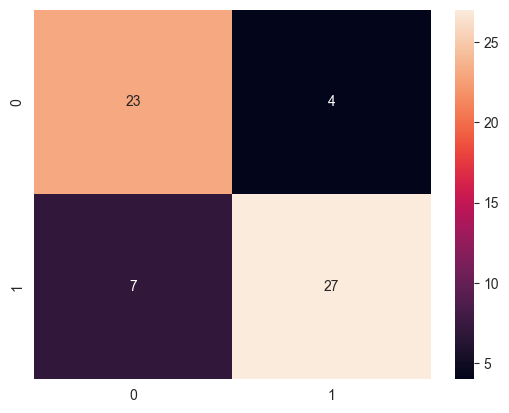

In [158]:
sns.heatmap(matrix,annot = True, fmt = "d")

# precision score

In [159]:
from sklearn.metrics import precision_score

In [160]:
precision = precision_score(Y_test, y_pred_dt)

In [161]:
print("Precision: ",precision)

Precision:  0.8709677419354839


# recall

In [162]:
from sklearn.metrics import recall_score

In [163]:
recall = recall_score(Y_test, y_pred_dt)

In [164]:
print("Recall is: ",recall)

Recall is:  0.7941176470588235


# f score

In [165]:
print((2*precision*recall)/(precision+recall))

0.8307692307692308


### bad cm style

In [166]:
CM = pd.crosstab(Y_test, y_pred_dt)
CM

col_0,0,1
target,,
0,23,4
1,7,27


## false negative rate

In [167]:
TN=CM.iloc[0,0]
FP=CM.iloc[0,1]
FN=CM.iloc[1,0]
TP=CM.iloc[1,1]
fnr = FN*100/(FN+TP)
fnr

20.58823529411765

# FINAL SCORE

In [168]:
# initialize an empty list
accuracy = []

# list of algorithms names
classifiers = ['KNN', 'Decision Trees', 'Logistic Regression', 'Naive Bayes', 'Random Forests']

# list of algorithms with parameters
models = [KNeighborsClassifier(n_neighbors=8), DecisionTreeClassifier(max_depth=3, random_state=0), LogisticRegression(), 
        GaussianNB(), RandomForestClassifier(n_estimators=100, random_state=0)]

# loop through algorithms and append the score into the list
for i in models:
    model = i
    model.fit(X_train, Y_train)
    score = model.score(X_test, Y_test)
    accuracy.append(score)

In [169]:
# create a dataframe from accuracy results
summary = pd.DataFrame({'accuracy':accuracy}, index=classifiers)       
summary

,accuracy
KNN,0.688525
Decision Trees,0.819672
Logistic Regression,0.852459
Naive Bayes,0.852459
Random Forests,0.885246


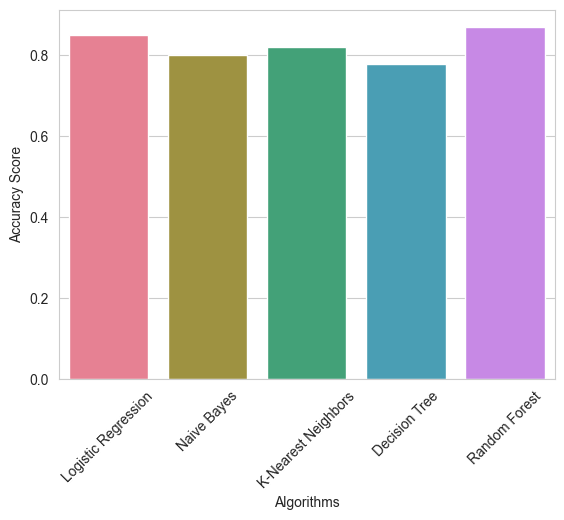

In [171]:
import seaborn as sns
import matplotlib.pyplot as plt

# Example accuracy scores for each algorithm (replace these with your actual scores)
score_lr = 0.85
score_nb = 0.80
score_knn = 0.82
score_dt = 0.78
score_rf = 0.87

# Store the scores in a list
scores = [score_lr, score_nb, score_knn, score_dt, score_rf]
algorithms = ["Logistic Regression", "Naive Bayes", "K-Nearest Neighbors", "Decision Tree", "Random Forest"]

# Define a custom color palette based on the number of bars
palette = sns.color_palette("husl", len(scores))

# Create the bar plot with the custom color palette
sns.barplot(x=algorithms, y=scores, palette=palette)
plt.xlabel("Algorithms")
plt.ylabel("Accuracy Score")
plt.xticks(rotation=45)  # Rotate the x-axis labels for better readability
plt.show()




---

